# Report:

## Introduction

## Import Packages

In [2]:
import os
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from scipy.stats import pearsonr
from sqlalchemy import create_engine

# Method

### Datasource1: Vegetables: Yield and cultivated area per kind (type) of vegetable

* Data URL:  https://opendata.cbs.nl/statline/#/CBS/en/dataset/37738ENG/table
* CSV Downloadable URL: https://opendata.cbs.nl/CsvDownload/csv/37738ENG/TypedDataSet?dl=9ADD1
* Data Type: CSV


This dataset contains information about the harvest of vegetables in the european countryNetherlands.
It concerns the harvest of vegetables (total yield in million-kg) and the corresponding cropping area (in hectares).

Gross yield = The yield of vegetables, in million kg..

Cropping area = The total cropping area is basically equal to the sown area per year.

The vegetables are broken down as follows:
- strawberries
- leaf and stem vegetables: endive; asparagus; fennel; leeks; celery; lettuce (iceberg, leaf and other); spinach.
- mushrooms
- tuberous and root vegetables: bunched and washed carrots; celeriac; beetroot; radish; scorzonera; onions; winter carrots
- kinds of cabbage: cauliflower; kale; broccoli; Chinese cabbage; green cabbage; red cabbage; conical cabbage; sprouts; white cabbage
- legumes: peas; French beans; broad beans
- fruit eaten as vegetables: eggplant; courgette; cucumber; pepper; tomato
- other vegetables

### Datasource2: Environmental accounts; emissions to water 1995 to 2014

* Data URL: https://opendata.cbs.nl/statline/#/CBS/en/dataset/83605ENG/table?ts=1698675109480
* CSV Downloadable URL: https://opendata.cbs.nl/CsvDownload/csv/83605ENG/TypedDataSet?dl=9ADCA  
* Data Type: CSV

This datset provided information about the origin of emissions to water of nutrients and heavy metals into water. These data are part of the environmental accounts. Direct emissions are emitted directly into the environment. Indirect emissions reach the environment in an indirect way. For example, discharges to the sewer system partly reach the surface water after treatment in wastewater treatment plants.

Factors like:
1- Total origin emissions on water
2- Agriculture, forestry and fishing
3- Industry (no construction), energy
4- Chemistry and pharmaceutical

A group of metals with a high atomic weight. This concerns, in particular, the metals with a high toxicity purpose, such as arsenic, cadmium, chromium, copper, mercury, nickel, lead and zinc.

# Load Data

### Read data from datasource

In [3]:
_database = '../data/data.sqlite'

In [4]:
# If database doesn't exist, run datapipeline to create it
if not os.path.exists(_database):
    subprocess.run(["python", "../project/pipeline.py"])

# Load data from database
engine = create_engine(f'sqlite:///{_database}')
connection = engine.connect()

df_vegetable = pd.read_sql_table('vegetable', connection,index_col='Vegetables')
df_water = pd.read_sql_table('water', connection, index_col='Origin')

#  <span style="color:red"> **1 - Vegetable Data** </span>

## Configure

In [5]:
df_vegetable

,year,gross_yield_million_kilogram
Vegetables,,
Onion/Garlic,1998,3339
Onion/Garlic,2000,"3814,8"
Onion/Garlic,2005,4255
Onion/Garlic,2006,"4151,2"
Onion/Garlic,2010,"4626,8"
...,...,...
Courgette,2010,18
Courgette,2015,"18,4"
Courgette,2020,"16,2"


In [6]:
# df_vegetable.reset_index()

In [7]:
# # Method 1 (works):
# df_vegetable.loc[df_vegetable['year'] == 2010]

# # Method 2 (works):
# # df_vegetable[df_vegetable['year'] == 2010]

In [8]:
 df_vegetable.columns

Index(['year', 'gross_yield_million_kilogram'], dtype='object')

In [9]:
df_vegetable.index.name

'Vegetables'

In [10]:
df_vegetable.index.unique()

Index(['Onion/Garlic', 'Strawberry', 'Spinach', 'Belgian endive', 'Lettuce',
       'Iceberg', 'Tuberous', 'Radishes', 'Carrot', 'Cabbage', 'Legume',
       'Bean', 'Apple', 'Courgette'],
      dtype='object', name='Vegetables')

In [11]:
df_vegetable.year.unique()

array([1998, 2000, 2005, 2006, 2010, 2015, 2020, 2021, 2022], dtype=int64)

In [12]:
# #  X-axis : Year (df_vegetable.year)
# #  Y-axis: Names of vegetables (df_vegetable.index)
# # df_vegetable.loc[df_vegetable.index == 'Onion/Garlic'
# plt.plot(df_vegetable.year, df_vegetable.index, 'o-')
# plt.title('New registrations of cars in germany (per year)')
# plt.legend(df_vegetable.columns)
# plt.show()

In [13]:
# Convert European punkt (,) to American decimal (.)
df_vegetable["gross_yield_million_kilogram"] =  df_vegetable["gross_yield_million_kilogram"].str.replace(',','.')

# Sorting by column 'gross_yield_million_kilogram'
df_vegetable = df_vegetable.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)

# Convert data type from string to float
df_vegetable["gross_yield_million_kilogram"] = df_vegetable.gross_yield_million_kilogram.astype(float)

In [14]:
df_vegetable.dtypes

year                              int64
gross_yield_million_kilogram    float64
dtype: object

## <span style="color:blue"> **1.1 - Filter Data** </span> 

## 1.1.1 - By year

In [16]:
# Filter data by year
# # Method 1 (works): Select subset from dataframe
fixed_year_1998 = df_vegetable.loc[df_vegetable['year'] == 1998]
fixed_year_2000 = df_vegetable.loc[df_vegetable['year'] == 2000]
fixed_year_2005 = df_vegetable.loc[df_vegetable['year'] == 2005]
# fixed_year_2006 = df_vegetable.loc[df_vegetable['year'] == 2006]
fixed_year_2010 = df_vegetable.loc[df_vegetable['year'] == 2010]
fixed_year_2015 = df_vegetable.loc[df_vegetable['year'] == 2015]
fixed_year_2020 = df_vegetable.loc[df_vegetable['year'] == 2020]
# fixed_year_2021 = df_vegetable.loc[df_vegetable['year'] == 2021]
# fixed_year_2022 = df_vegetable.loc[df_vegetable['year'] == 2022]

# # Method 2 (works):
# # df_vegetable[df_vegetable['year'] == 2010]

In [17]:
# fixed_year_1998["gross_yield_million_kilogram"] = fixed_year_1998["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2000["gross_yield_million_kilogram"] = fixed_year_2000["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2005["gross_yield_million_kilogram"] = fixed_year_2005["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2006["gross_yield_million_kilogram"] = fixed_year_2006["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2010["gross_yield_million_kilogram"] = fixed_year_2010["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2015["gross_yield_million_kilogram"] = fixed_year_2015["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2020["gross_yield_million_kilogram"] = fixed_year_2020["gross_yield_million_kilogram"].str.replace(',','.')
# fixed_year_2021["gross_yield_million_kilogram"] = fixed_year_2021["gross_yield_million_kilogram"].str.replace(',','.')
# # fixed_year_2022["gross_yield_million_kilogram"] = fixed_year_2022["gross_yield_million_kilogram"].str.replace(',','.')

In [18]:
# Method 2: do it for one 
# Sorting by column 'gross_yield_million_kilogram'
# fixed_year_1998 = fixed_year_1998.sort_values(by=['gross_yield_million_kilogram'], ascending=True)

## 1.1.2 - By Index

In [19]:
# Filter data by index
onion = df_vegetable.loc[df_vegetable.index == 'Onion/Garlic']
Strawberry = df_vegetable.loc[df_vegetable.index == 'Strawberry']
Spinach = df_vegetable.loc[df_vegetable.index == 'Spinach']
Belgian_endive = df_vegetable.loc[df_vegetable.index == 'Belgian endive']
Lettuce = df_vegetable.loc[df_vegetable.index == 'Lettuce']
Iceberg = df_vegetable.loc[df_vegetable.index == 'Iceberg']
Tuberous = df_vegetable.loc[df_vegetable.index == 'Tuberous']
Radishes = df_vegetable.loc[df_vegetable.index == 'Radishes']
Carrot = df_vegetable.loc[df_vegetable.index == 'Carrot']
Cabbage = df_vegetable.loc[df_vegetable.index == 'Cabbage']
Legume = df_vegetable.loc[df_vegetable.index == 'Legume']
Bean = df_vegetable.loc[df_vegetable.index == 'Bean']
Apple = df_vegetable.loc[df_vegetable.index == 'Apple']
Courgette = df_vegetable.loc[df_vegetable.index == 'Courgette']

## <span style="color:blue"> **1.2 - Plotting** </span> 

## 1.2.1 - Plot for all vegetables for a single fixed Year

### `Year = 1998`

In [20]:
# # Sorting by column 'gross_yield_million_kilogram'
# fixed_year_1998 = fixed_year_1998.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)
# fixed_year_1998

<function matplotlib.pyplot.show(close=None, block=None)>

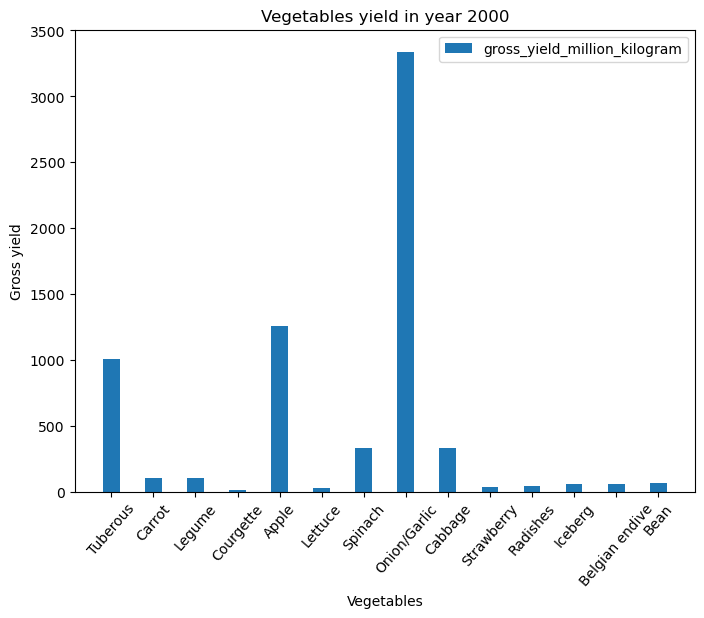

In [21]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)

# X-axis: Names of vegetables (yearly.index)
# Values: Yield in kilograms (yearly.gross_yield_million_kilogram)
# Y-axis: Yield in kilograms (yearly.gross_yield_million_kilogram)
plt.bar(fixed_year_1998.index, fixed_year_1998.gross_yield_million_kilogram,  0.4, label='gross_yield_million_kilogram')
plt.legend()
plt.title('Vegetables yield in year 2000')
plt.ylabel('Gross yield')
plt.xlabel('Vegetables')
plt.xticks(rotation=49)
# plt.xticks(yearly.year)
# plt.xticks(df_water.Year.unique())
plt.show

### `Year = 2000`

In [22]:
fixed_year_2000

,year,gross_yield_million_kilogram
Vegetables,,
Courgette,2000,11.0
Apple,2000,1259.0
Carrot,2000,132.0
Tuberous,2000,1453.0
Lettuce,2000,22.0
Cabbage,2000,326.5
Strawberry,2000,34.3
Spinach,2000,349.0
Radishes,2000,35.0


<function matplotlib.pyplot.show(close=None, block=None)>

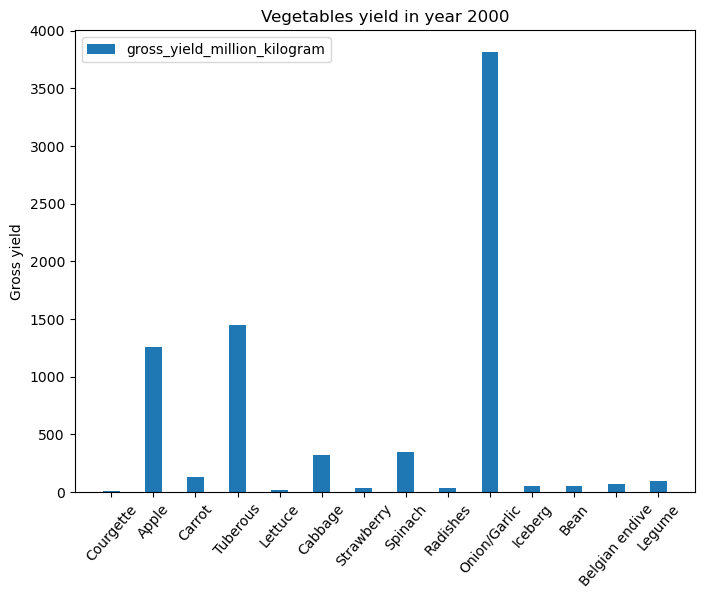

In [23]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)

# X-axis: Names of vegetables (yearly.index)
# Values: Yield in kilograms (yearly.gross_yield_million_kilogram)
# Y-axis: Yield in kilograms (yearly.gross_yield_million_kilogram)
plt.bar(fixed_year_2000.index, fixed_year_2000.gross_yield_million_kilogram,  0.4, label='gross_yield_million_kilogram')
plt.legend()
plt.title('Vegetables yield in year 2000')
plt.ylabel('Gross yield')
plt.xticks(rotation=49)
# plt.xticks(yearly.year)
# plt.xticks(df_water.Year.unique())
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

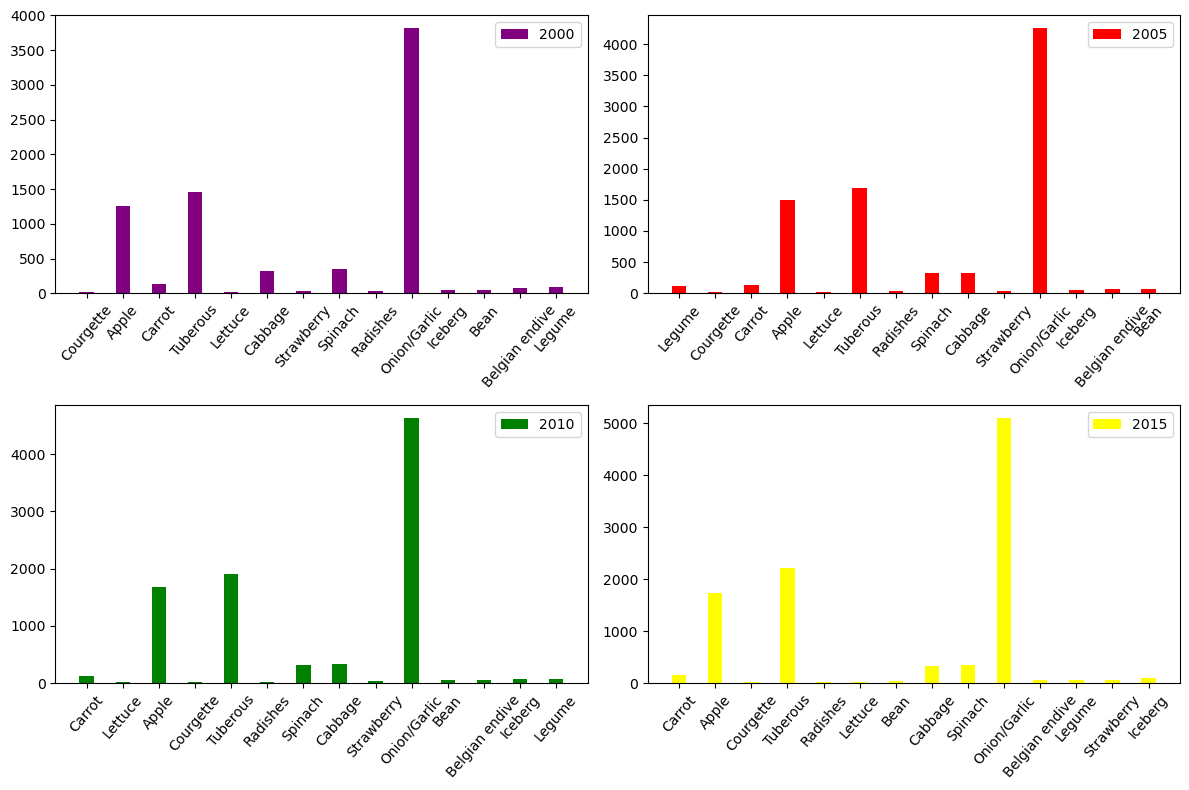

In [43]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].bar(fixed_year_2000.index, fixed_year_2000.gross_yield_million_kilogram,  0.4, label='2000', color='purple')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)

axes[0,1].bar(fixed_year_2005.index, fixed_year_2005.gross_yield_million_kilogram,  0.4, label='2005', color='red')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=49)

axes[1,0].bar(fixed_year_2010.index, fixed_year_2010.gross_yield_million_kilogram,  0.4, label='2010', color='green')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=49)

axes[1,1].bar(fixed_year_2015.index, fixed_year_2015.gross_yield_million_kilogram,  0.4, label='2015', color='yellow')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=49)

fig.tight_layout()
plt.show

In [25]:
### Method 1: little bit of problem


# plt.figure(figsize=(12, 7))
# plt.subplot(1, 1, 1)

# plt.bar(fixed_year_1998.index, fixed_year_1998.gross_yield_million_kilogram,  0.1, label='1998')
# plt.bar(fixed_year_2000.index, fixed_year_2000.gross_yield_million_kilogram,  0.2, label='2000')
# plt.bar(fixed_year_2005.index, fixed_year_2005.gross_yield_million_kilogram,  0.3, label='2005')
# plt.bar(fixed_year_2006.index, fixed_year_2006.gross_yield_million_kilogram,  0.4, label='2006')
# plt.bar(fixed_year_2010.index, fixed_year_2010.gross_yield_million_kilogram,  0.5, label='2010')
# plt.bar(fixed_year_2015.index, fixed_year_2015.gross_yield_million_kilogram,  0.1, label='2015')
# plt.bar(fixed_year_2020.index, fixed_year_2020.gross_yield_million_kilogram,  0.1, label='2020')
# plt.bar(fixed_year_2021.index, fixed_year_2021.gross_yield_million_kilogram,  0.1, label='2021')
# plt.bar(fixed_year_2022.index, fixed_year_2022.gross_yield_million_kilogram,  0.1, label='2022')

# plt.legend()
# plt.title('Vegetables yield in year 1998')
# plt.ylabel('Gross yield')
# plt.xlabel('Vegetables')
# plt.xticks(rotation=49)
# plt.show


Object `## Method 2: works fine` not found.


<function matplotlib.pyplot.show(close=None, block=None)>

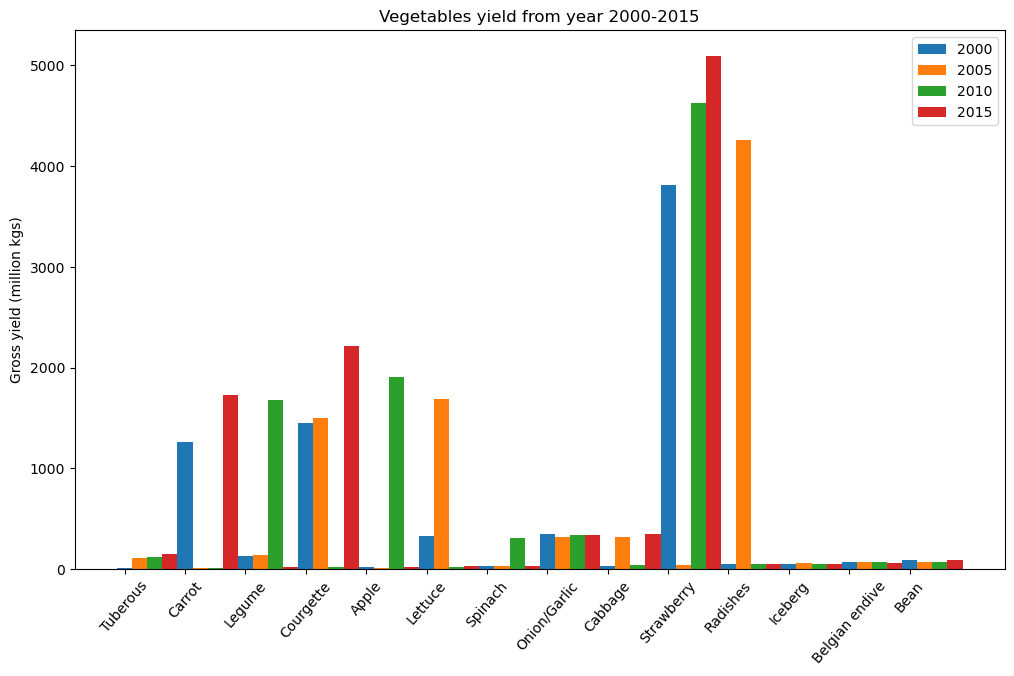

In [29]:
?## Method 2: works fine
ind = np.arange(len(fixed_year_2020))  
width = 0.25

plt.figure(figsize=(12, 7))
plt.subplot(1, 1, 1)

plt.bar(ind+width, fixed_year_2000.gross_yield_million_kilogram,  width, label='2000')
plt.bar(ind+width*2, fixed_year_2005.gross_yield_million_kilogram,  width, label='2005')
plt.bar(ind+width*3, fixed_year_2010.gross_yield_million_kilogram,  width, label='2010')
plt.bar(ind+width*4, fixed_year_2015.gross_yield_million_kilogram,  width, label='2015')

plt.legend()
plt.title('Vegetables yield from year 2000-2015')
plt.ylabel('Gross yield (million kgs)')
plt.xticks(ind+width, fixed_year_1998.index) 
plt.xticks(rotation=49)
plt.show


In [33]:
# ind = np.arange(len(fixed_year_2000))  
# width = 0.25

# plt.figure(figsize=(12, 7))
# plt.subplot(1, 1, 1)

# plt.bar(ind, fixed_year_1998.gross_yield_million_kilogram,  width, label='1998')
# plt.bar(ind+width*2, fixed_year_2000.gross_yield_million_kilogram,  width, label='2000')
# plt.bar(ind+width*4, fixed_year_2005.gross_yield_million_kilogram,  width, label='2005')
# # plt.bar(ind+width*3, fixed_year_2006.gross_yield_million_kilogram,  width, label='2006')
# plt.bar(ind+width*6, fixed_year_2010.gross_yield_million_kilogram,  width, label='2010')
# plt.bar(ind+width*8, fixed_year_2015.gross_yield_million_kilogram,  width, label='2015')
# # plt.bar(ind+width*6, fixed_year_2020.gross_yield_million_kilogram,  width, label='2020')
# # plt.bar(ind+width*7, fixed_year_2021.gross_yield_million_kilogram,  width, label='2021')
# # plt.bar(ind+width*8, fixed_year_2022.gross_yield_million_kilogram,  width, label='2022')

# plt.legend()
# plt.title('Vegetables yield in year 1998-2015')
# plt.ylabel('Gross yield')
# plt.xlabel('Vegetables')
# plt.xticks(ind+width, fixed_year_1998.index) 
# plt.xticks(rotation=49)
# plt.show


## 1.2.2 - Plot of a single vegetable over the years

## `Curve plot a single vegetable`

In [34]:
# Sort according to ['year']

onion = onion.sort_values(by=['year'], axis=0, ascending=True)
Strawberry = Strawberry.sort_values(by=['year'], axis=0, ascending=True)
Spinach = Spinach.sort_values(by=['year'], axis=0, ascending=True)
Belgian_endive = Belgian_endive.sort_values(by=['year'], axis=0, ascending=True)
Lettuce = Lettuce.sort_values(by=['year'], axis=0, ascending=True)
Iceberg = Iceberg.sort_values(by=['year'], axis=0, ascending=True)
Tuberous = Tuberous.sort_values(by=['year'], axis=0, ascending=True)
Radishes = Radishes.sort_values(by=['year'], axis=0, ascending=True)
Carrot = Carrot.sort_values(by=['year'], axis=0, ascending=True)
Cabbage = Cabbage.sort_values(by=['year'], axis=0, ascending=True)
Legume = Strawberry.sort_values(by=['year'], axis=0, ascending=True)
Bean = Lettuce.sort_values(by=['year'], axis=0, ascending=True)
Apple = Apple.sort_values(by=['year'], axis=0, ascending=True)
Courgette = Courgette.sort_values(by=['year'], axis=0, ascending=True)

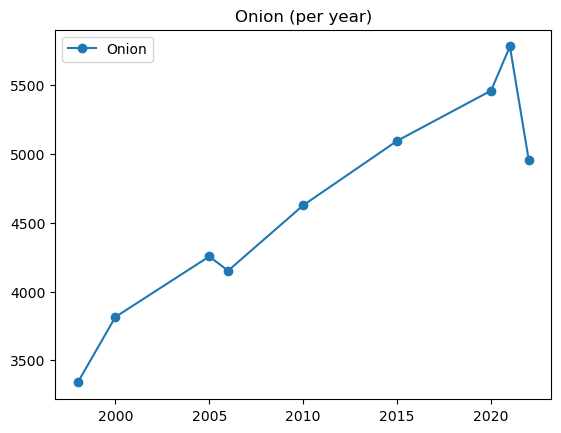

In [35]:
#  X-axis : Year (df_vegetable.year)
#  Y-axis: Names of vegetables (df_vegetable.index)

# plt.plot(df_vegetable.year, df_vegetable.index, 'o-')

plt.plot(onion.year, onion.gross_yield_million_kilogram, 'o-', label='Onion')
plt.title('Onion (per year)')
plt.legend()
plt.show()

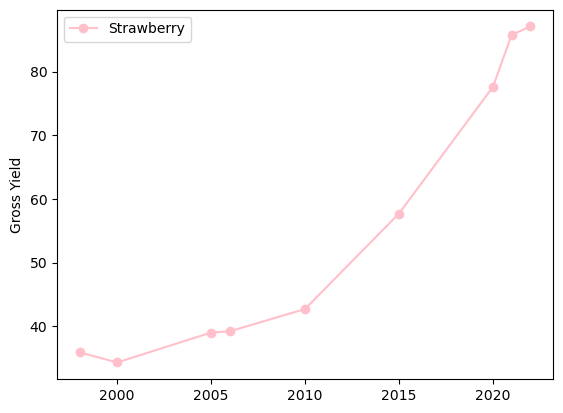

In [36]:
fig, ax1 = plt.subplots()

ax1.plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', label='Strawberry', color='pink')
ax1.set_ylabel('Gross Yield')
plt.legend()
plt.show()

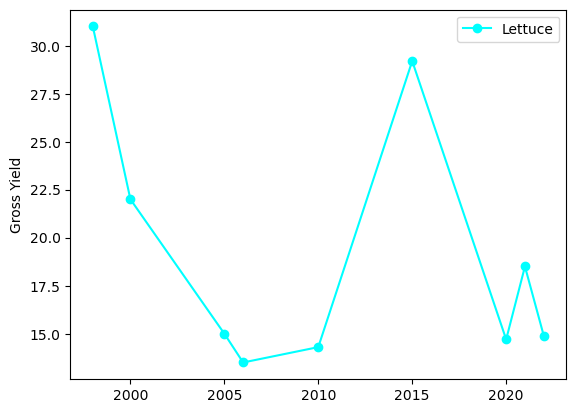

In [37]:
fig, ax1 = plt.subplots()

ax1.plot(Lettuce.year, Lettuce.gross_yield_million_kilogram, 'o-', label='Lettuce', color='cyan')
ax1.set_ylabel('Gross Yield')
plt.legend()
plt.show()

In [38]:
# Same as below
# fig, ax1 = plt.subplots(figsize=(12, 7))

# # ax1.plot(onion.year, onion.gross_yield_million_kilogram, 'o-', label='Onion')
# ax1.plot(onion.year, Strawberry.gross_yield_million_kilogram, 'o-', label='Strawberry', color='pink')
# ax1.plot(onion.year, Spinach.gross_yield_million_kilogram, 'o-', label='Strawberry', color='red')
# ax1.plot(onion.year, Belgian_endive.gross_yield_million_kilogram, 'o-', label='Belgian_endive', color='blue')
# ax1.plot(onion.year, Lettuce.gross_yield_million_kilogram, 'o-', label='Lettuce', color='cyan')
# ax1.plot(onion.year, Iceberg.gross_yield_million_kilogram, 'o-', label='Iceberg', color='black')
# # ax1.plot(onion.year, Tuberous.gross_yield_million_kilogram, 'o-', label='Tuberous', color='gray')
# ax1.plot(onion.year, Radishes.gross_yield_million_kilogram, 'o-', label='Radishes', color='orange')
# ax1.plot(onion.year, Carrot.gross_yield_million_kilogram, 'o-', label='Carrot', color='yellow')

# ax1.plot(onion.year, Cabbage.gross_yield_million_kilogram, 'o-', label='Cabbage', color='maroon')
# ax1.plot(onion.year, Legume.gross_yield_million_kilogram, 'o-', label='Legume', color='#AC0192')
# ax1.plot(onion.year, Bean.gross_yield_million_kilogram, 'o-', label='Bean', color='black')
# # ax1.plot(onion.year, Apple.gross_yield_million_kilogram, 'o-', label='Apple', color='gray')
# ax1.plot(onion.year, Courgette.gross_yield_million_kilogram, 'o-', label='Courgette', color='gray')

# ax1.set_ylabel('Gross Yield')
# # plt.legend()
# plt.show()

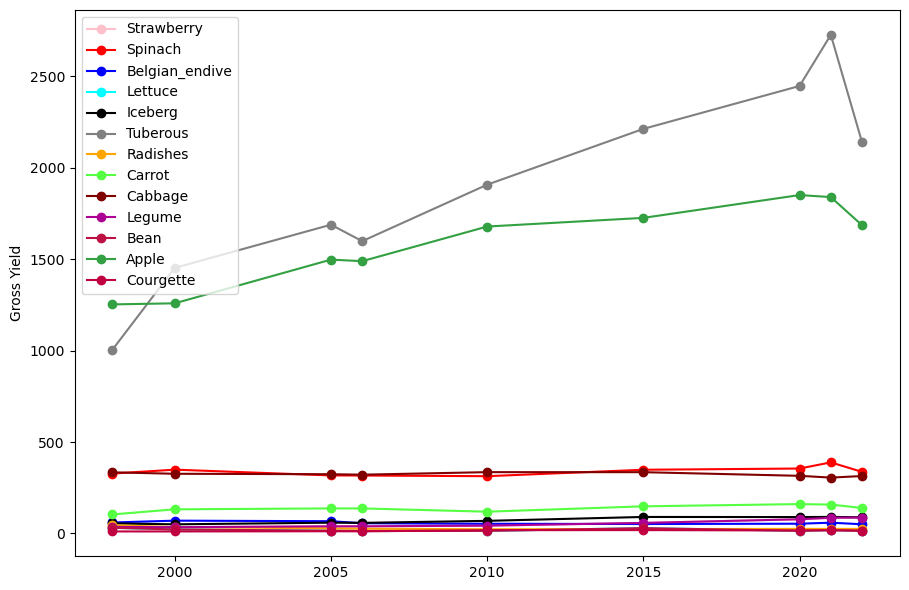

In [54]:
fig, ax1 = plt.subplots(figsize=(9, 6))

# ax1.plot(onion.year, onion.gross_yield_million_kilogram, 'o-', label='Onion')
ax1.plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', label='Strawberry', color='pink')
ax1.plot(Spinach.year, Spinach.gross_yield_million_kilogram, 'o-', label='Spinach', color='red')
ax1.plot(Belgian_endive.year, Belgian_endive.gross_yield_million_kilogram, 'o-', label='Belgian_endive', color='blue')
ax1.plot(Lettuce.year, Lettuce.gross_yield_million_kilogram, 'o-', label='Lettuce', color='cyan')
ax1.plot(Iceberg.year, Iceberg.gross_yield_million_kilogram, 'o-', label='Iceberg', color='black')
ax1.plot(Tuberous.year, Tuberous.gross_yield_million_kilogram, 'o-', label='Tuberous', color='gray')
ax1.plot(Radishes.year, Radishes.gross_yield_million_kilogram, 'o-', label='Radishes', color='orange')
ax1.plot(Carrot.year, Carrot.gross_yield_million_kilogram, 'o-', label='Carrot', color='#55FF42')

ax1.plot(Cabbage.year, Cabbage.gross_yield_million_kilogram, 'o-', label='Cabbage', color='maroon')
ax1.plot(Legume.year, Legume.gross_yield_million_kilogram, 'o-', label='Legume', color='#AC0192')
ax1.plot(Bean.year, Bean.gross_yield_million_kilogram, 'o-', label='Bean', color='#BC1142')
ax1.plot(Apple.year, Apple.gross_yield_million_kilogram, 'o-', label='Apple', color='#33A042')
ax1.plot(Courgette.year, Courgette.gross_yield_million_kilogram, 'o-', label='Courgette', color='#C10042')

fig.tight_layout()
ax1.set_ylabel('Gross Yield')
plt.legend()
plt.show()

In [ ]:
# 'Onion/Garlic', 1
# 'Strawberry', 2
# 'Spinach', 3
# 'Belgian endive', 4 
# 'Lettuce', 5
# 'Iceberg', 6
# 'Tuberous', 7
# 'Radishes', 8
# 'Carrot', 9
#  'Cabbage', 10 
# 'Legume', 11
#  'Bean', 12
# 'Apple',  13
# 'Courgette' 14

<function matplotlib.pyplot.show(close=None, block=None)>

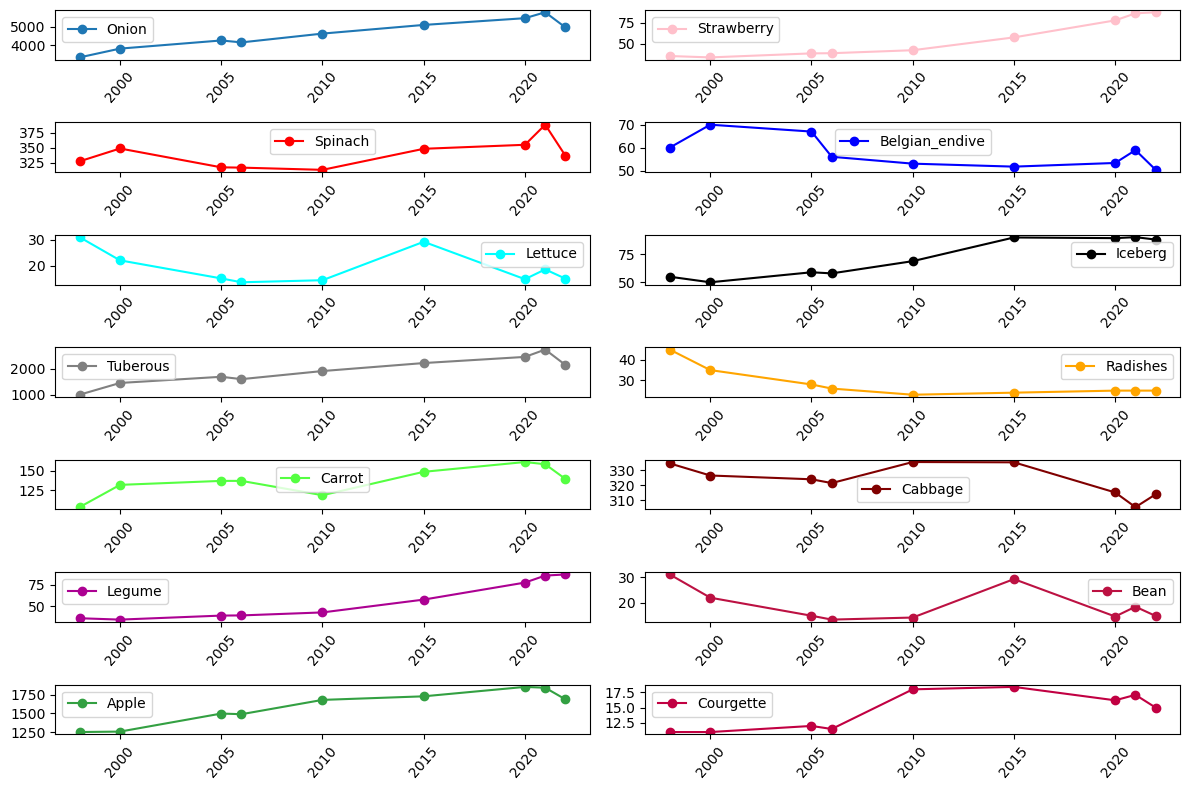

In [49]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 8))

axes[0,0].plot(onion.year, onion.gross_yield_million_kilogram, 'o-', label='Onion')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)

axes[0,1].plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', label='Strawberry', color='pink')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=49)

axes[1,0].plot(Spinach.year, Spinach.gross_yield_million_kilogram, 'o-', label='Spinach', color='red')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=49)

axes[1,1].plot(Belgian_endive.year, Belgian_endive.gross_yield_million_kilogram, 'o-', label='Belgian_endive', color='blue')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=49)

axes[2,0].plot(Lettuce.year, Lettuce.gross_yield_million_kilogram, 'o-', label='Lettuce', color='cyan')
axes[2,0].legend()
axes[2,0].tick_params(axis='x', rotation=49)

axes[2,1].plot(Iceberg.year, Iceberg.gross_yield_million_kilogram, 'o-', label='Iceberg', color='black')
axes[2,1].legend()
axes[2,1].tick_params(axis='x', rotation=49)

axes[3,0].plot(Tuberous.year, Tuberous.gross_yield_million_kilogram, 'o-', label='Tuberous', color='gray')
axes[3,0].legend()
axes[3,0].tick_params(axis='x', rotation=49)

axes[3,1].plot(Radishes.year, Radishes.gross_yield_million_kilogram, 'o-', label='Radishes', color='orange')
axes[3,1].legend()
axes[3,1].tick_params(axis='x', rotation=49)

axes[4,0].plot(Carrot.year, Carrot.gross_yield_million_kilogram, 'o-', label='Carrot', color='#55FF42')
axes[4,0].legend()
axes[4,0].tick_params(axis='x', rotation=49)

axes[4,1].plot(Cabbage.year, Cabbage.gross_yield_million_kilogram, 'o-', label='Cabbage', color='maroon')
axes[4,1].legend()
axes[4,1].tick_params(axis='x', rotation=49)

axes[5,0].plot(Legume.year, Legume.gross_yield_million_kilogram, 'o-', label='Legume', color='#AC0192')
axes[5,0].legend()
axes[5,0].tick_params(axis='x', rotation=49)

axes[5,1].plot(Bean.year, Bean.gross_yield_million_kilogram, 'o-', label='Bean', color='#BC1142')
axes[5,1].legend()
axes[5,1].tick_params(axis='x', rotation=49)

axes[6,0].plot(Apple.year, Apple.gross_yield_million_kilogram, 'o-', label='Apple', color='#33A042')
axes[6,0].legend()
axes[6,0].tick_params(axis='x', rotation=49)

axes[6,1].plot(Courgette.year, Courgette.gross_yield_million_kilogram, 'o-', label='Courgette', color='#C10042')
axes[6,1].legend()
axes[6,1].tick_params(axis='x', rotation=49)

fig.tight_layout()

plt.show

## `Bar plots of a single vegetable`

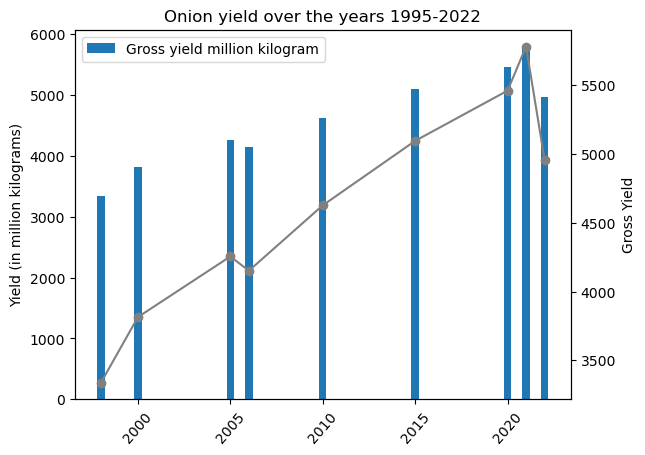

In [55]:
fig, ax1 = plt.subplots()

ax1.bar(onion.year, onion.gross_yield_million_kilogram,  0.4, label='Gross yield million kilogram')
plt.legend()
plt.title('Onion yield over the years 1995-2022')
plt.ylabel('Yield (in million kilograms)')
plt.xticks(rotation=49)

ax2 = ax1.twinx()

ax2.plot(onion.year, onion.gross_yield_million_kilogram, 'o-', color='grey')
ax2.set_ylabel('Gross Yield')

# fig.tight_layout()
plt.show()

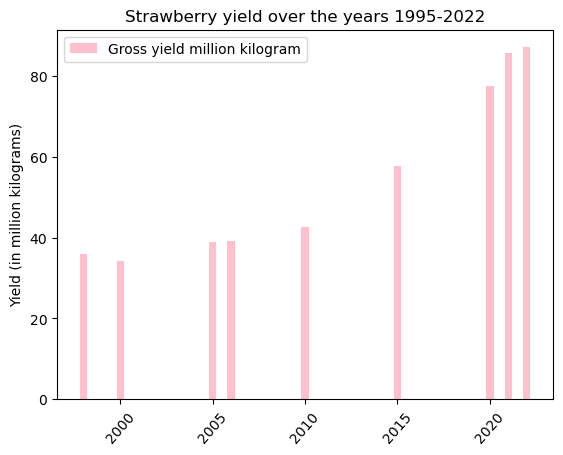

In [56]:
plt.figure()
plt.subplot(1, 1, 1)

# X-axis: Years (Strawberry.year)
# Values: Yield in kilograms Strawberry.gross_yield_million_kilogram
# Y-axis: Yield in kilograms (Strawberry.gross_yield_million_kilogram
plt.bar(Strawberry.year, Strawberry.gross_yield_million_kilogram,  0.4, label='Gross yield million kilogram', color='pink')
plt.legend()
plt.title('Strawberry yield over the years 1995-2022')
plt.ylabel('Yield (in million kilograms)')
plt.xticks(rotation=49)
plt.show()

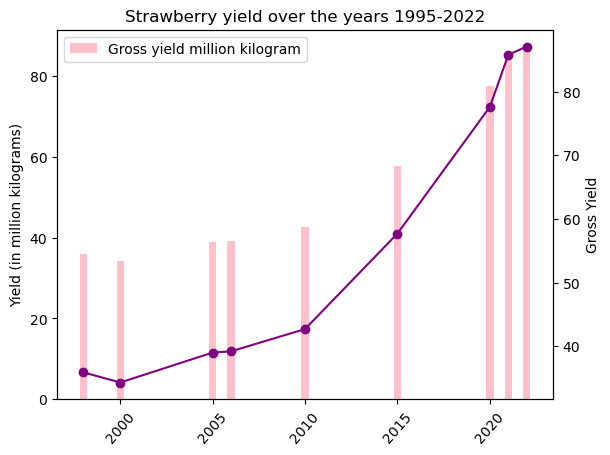

In [57]:
fig, ax1 = plt.subplots()

ax1.bar(Strawberry.year, Strawberry.gross_yield_million_kilogram,  0.4, label='Gross yield million kilogram', color='pink')
plt.legend()
plt.title('Strawberry yield over the years 1995-2022')
plt.ylabel('Yield (in million kilograms)')
plt.xticks(rotation=49)

ax2 = ax1.twinx()

ax2.plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', color='purple')
ax2.set_ylabel('Gross Yield')

# fig.tight_layout()
plt.show()

## 1.2.3 - Plot by index

In [58]:
# TODO

## 1.2.4 - Plot for comparison over the year

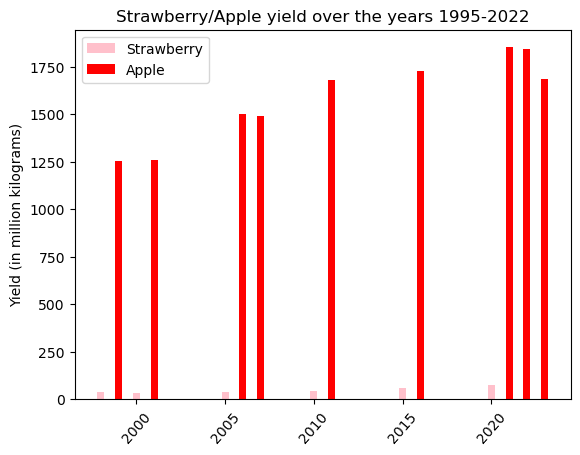

In [59]:
fig, ax1 = plt.subplots()

ax1.bar(Strawberry.year, Strawberry.gross_yield_million_kilogram,  0.4, label='Strawberry', color='pink')
ax1.bar(Apple.year+1, Apple.gross_yield_million_kilogram,  0.4, label='Apple', color='red')
plt.legend(['Strawberry', 'Apple'])
plt.title('Strawberry/Apple yield over the years 1995-2022')
plt.ylabel('Yield (in million kilograms)')
plt.xticks(rotation=49)

# ax2 = ax1.twinx()

# ax2.plot(Strawberry.year, pd.aveStrawberry.gross_yield_million_kilogram, 'o-', color='purple')
# ax2.set_ylabel('Gross Yield')t

# fig.tight_layout()
plt.show()

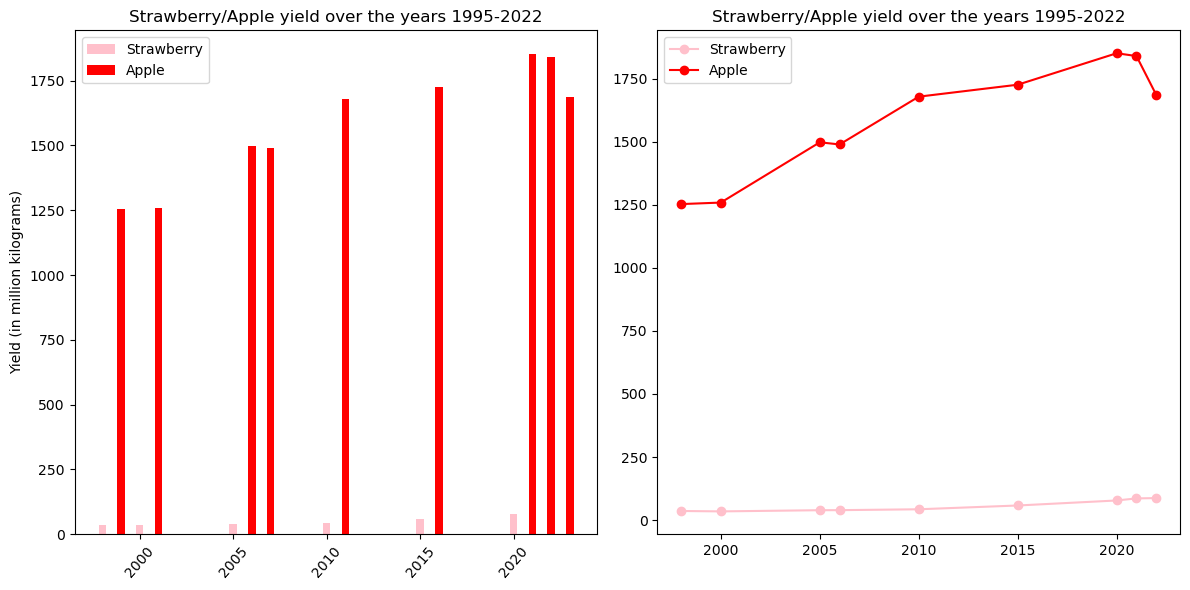

In [60]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(Strawberry.year, Strawberry.gross_yield_million_kilogram, 0.4, label='Strawberry', color='pink')
ax1.bar(Apple.year+1, Apple.gross_yield_million_kilogram, 0.4, label='Apple', color='red')
ax1.legend()
ax1.set_title('Strawberry/Apple yield over the years 1995-2022')
ax1.set_ylabel('Yield (in million kilograms)')
ax1.tick_params(axis='x', rotation=49)

ax3.plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', label='Strawberry', color='pink')
ax3.plot(Apple.year, Apple.gross_yield_million_kilogram, 'o-', label='Apple', color='red')
ax3.legend()
ax3.set_title('Strawberry/Apple yield over the years 1995-2022')
# ax3.set_ylabel('Yield (in million kilograms)')

plt.tight_layout()
plt.show()

# Vegetable Playground

In [61]:
df_vegetable

,year,gross_yield_million_kilogram
Vegetables,,
Tuberous,1998,1004.0
Carrot,1998,104.0
Legume,1998,106.1
Legume,2006,108.0
Legume,2005,108.5
...,...,...
Iceberg,2020,89.7
Iceberg,2015,90.3
Iceberg,2021,90.6


In [62]:
df_vegetable.groupby(df_vegetable.index).sum()

,year,gross_yield_million_kilogram
Vegetables,,
Apple,18097,14282.2
Bean,18097,502.4
Belgian endive,18097,520.2
Cabbage,18097,2912.1
Carrot,18097,1235.4
Courgette,18097,130.2
Iceberg,18097,650.0
Legume,18097,793.6
Lettuce,18097,173.1


In [63]:
df_vegetable.groupby('year').sum()

,gross_yield_million_kilogram
year,
1998,6775.0
2000,7701.6
2005,8619.5
2006,8397.4
2010,9319.4
2015,10226.7
2020,10988.4
2021,11650.3
2022,9994.0


#  <span style="color:red"> **2 - Water Data** </span>

## Configure 

In [64]:
df_water

,Year,Chromium,Copper,Mercury,Lead,Nickel,Zinc,OtherNutrients,Phosphorus
Origin,,,,,,,,,
Agriculture,1995.0,0.0,20934.0,NaN,2872.0,45056.0,190855.0,13257.0,5086612.0
Agriculture,2000.0,9.0,21654.0,NaN,2768.0,45687.0,200714.0,13576.0,5197126.0
Agriculture,2005.0,0.0,15711.0,NaN,1909.0,31266.0,137232.0,8256.0,3597292.0
Agriculture,2010.0,0.0,18227.0,NaN,2219.0,37191.0,163841.0,8918.0,3807974.0
Agriculture,2013.0,0.0,17514.0,NaN,2090.0,34803.0,153944.0,7651.0,3570549.0
Agriculture,2014.0,0.0,17511.0,NaN,2088.0,34803.0,153931.0,7635.0,3560149.0
Industrial,1995.0,27414.0,40266.0,408.000000,13053.0,28869.0,91518.0,7433.0,5391283.0
Industrial,2000.0,10418.0,30330.0,165.000000,8362.0,12573.0,63879.0,4702.0,3268213.0
Industrial,2005.0,8492.0,22300.0,86.000000,3706.0,10389.0,49463.0,3334.0,1929056.0


In [65]:
df_water = df_water.dropna(axis=0)

In [66]:
df_water

,Year,Chromium,Copper,Mercury,Lead,Nickel,Zinc,OtherNutrients,Phosphorus
Origin,,,,,,,,,
Industrial,1995.0,27414.0,40266.0,408.0,13053.0,28869.0,91518.0,7433.0,5391283.0
Industrial,2000.0,10418.0,30330.0,165.0,8362.0,12573.0,63879.0,4702.0,3268213.0
Industrial,2005.0,8492.0,22300.0,86.0,3706.0,10389.0,49463.0,3334.0,1929056.0
Industrial,2010.0,2761.0,13454.0,23.0,1512.0,5493.0,25867.0,3029.0,1740726.0
Industrial,2013.0,2347.0,12164.0,27.0,1588.0,4723.0,26503.0,2380.0,1361662.0
Industrial,2014.0,2215.0,12362.0,12.0,1296.0,4468.0,20166.0,2383.0,1308156.0
Chemical Manufacturing,1995.0,7001.0,8386.0,216.0,5331.0,6131.0,27685.0,3592.0,3140946.0
Chemical Manufacturing,2000.0,2495.0,4780.0,25.0,1622.0,3328.0,26936.0,1684.0,1416894.0
Chemical Manufacturing,2005.0,3147.0,3761.0,15.0,1538.0,1959.0,21810.0,504.0,192690.0


In [67]:
# df_water = df_water.reset_index()

In [68]:
# df_water = df_water.set_index(['Origin', 'Year'])

## <span style="color:blue"> **2.1 - Filter Data** </span> 

## <span style="color:brown"> **2.1.1 - By year** </span> 

In [78]:
df_water.Year.unique()

array([1995., 2000., 2005., 2010., 2013., 2014.])

In [99]:
# # Method 2 (works):
# # year_df_vegetable = df_vegetable[df_vegetable['year'] == 2010]
water_year_1995 = df_water[df_water['Year'] == 1995]
water_year_2000 = df_water[df_water['Year'] == 2000]
water_year_2005 = df_water[df_water['Year'] == 2005]
water_year_2010 = df_water[df_water['Year'] == 2010]
# water_year_2013 = df_water[df_water['Year'] == 2013]
# water_year_2014 = df_water[df_water['Year'] == 2014]

In [100]:
water_year_1995

,Year,Chromium,Copper,Mercury,Lead,Nickel,Zinc,OtherNutrients,Phosphorus
Origin,,,,,,,,,
Industrial,1995.0,27414.0,40266.0,408.0,13053.0,28869.0,91518.0,7433.0,5391283.0
Chemical Manufacturing,1995.0,7001.0,8386.0,216.0,5331.0,6131.0,27685.0,3592.0,3140946.0
Pharmaceuticals Manufacturing,1995.0,1.0,164.0,0.0,271.0,163.0,665.0,76.0,50402.0


## <span style="color:brown"> **2.1.2 - By Column** </span> 

In [81]:
df_water.columns

Index(['Year', 'Chromium', 'Copper', 'Mercury', 'Lead', 'Nickel', 'Zinc',
       'OtherNutrients', 'Phosphorus'],
      dtype='object')

In [82]:
Chromium = df_water[['Chromium']]
Copper = df_water[['Copper']]
Mercury = df_water[['Mercury']]
Lead = df_water[['Lead']]
Nickel = df_water[['Nickel']]
Zinc = df_water[['Zinc']]
OtherNutrients = df_water[['OtherNutrients']]
Phosphorus = df_water[['Phosphorus']]

In [83]:
Phosphorus

,Phosphorus
Origin,
Industrial,5391283.0
Industrial,3268213.0
Industrial,1929056.0
Industrial,1740726.0
Industrial,1361662.0
Industrial,1308156.0
Chemical Manufacturing,3140946.0
Chemical Manufacturing,1416894.0
Chemical Manufacturing,192690.0


## <span style="color:brown"> **2.1.2 - By Index** </span> 

In [84]:
df_water.index.unique()

Index(['Industrial', 'Chemical Manufacturing',
       'Pharmaceuticals Manufacturing'],
      dtype='object', name='Origin')

In [85]:
# Filter data by index
# Agriculture = df_water.loc[df_water.index == 'Agriculture']
Industrial = df_water.loc[df_water.index == 'Industrial']
Chemical_Manufacturing = df_water.loc[df_water.index == 'Chemical Manufacturing']
Pharmaceuticals_Manufacturing = df_water.loc[df_water.index == 'Pharmaceuticals Manufacturing']

In [86]:
Industrial

,Year,Chromium,Copper,Mercury,Lead,Nickel,Zinc,OtherNutrients,Phosphorus
Origin,,,,,,,,,
Industrial,1995.0,27414.0,40266.0,408.0,13053.0,28869.0,91518.0,7433.0,5391283.0
Industrial,2000.0,10418.0,30330.0,165.0,8362.0,12573.0,63879.0,4702.0,3268213.0
Industrial,2005.0,8492.0,22300.0,86.0,3706.0,10389.0,49463.0,3334.0,1929056.0
Industrial,2010.0,2761.0,13454.0,23.0,1512.0,5493.0,25867.0,3029.0,1740726.0
Industrial,2013.0,2347.0,12164.0,27.0,1588.0,4723.0,26503.0,2380.0,1361662.0
Industrial,2014.0,2215.0,12362.0,12.0,1296.0,4468.0,20166.0,2383.0,1308156.0


## <span style="color:blue"> **2.2 - Plotting** </span> 

In [87]:
# plt.plot(df_water.year, df_water.index, 'o-')
# plt.title('New registrations of cars in germany (per year)')
# plt.legend(df_vegetable.columns)
# plt.show()

## <span style="color:green"> **2.2.1 - Plot By year** </span> 

In [88]:
water_year_1995

,Year,Chromium,Copper,Mercury,Lead,Nickel,Zinc,OtherNutrients,Phosphorus
Origin,,,,,,,,,
Industrial,1995.0,27414.0,40266.0,408.0,13053.0,28869.0,91518.0,7433.0,5391283.0
Chemical Manufacturing,1995.0,7001.0,8386.0,216.0,5331.0,6131.0,27685.0,3592.0,3140946.0
Pharmaceuticals Manufacturing,1995.0,1.0,164.0,0.0,271.0,163.0,665.0,76.0,50402.0


In [89]:
water_year_1995.Chromium[:]

Origin
Industrial                       27414.0
Chemical Manufacturing            7001.0
Pharmaceuticals Manufacturing        1.0
Name: Chromium, dtype: float64

In [90]:
water_year_1995[['Chromium']]

,Chromium
Origin,
Industrial,27414.0
Chemical Manufacturing,7001.0
Pharmaceuticals Manufacturing,1.0


In [91]:
water_year_1995.Chromium

Origin
Industrial                       27414.0
Chemical Manufacturing            7001.0
Pharmaceuticals Manufacturing        1.0
Name: Chromium, dtype: float64

In [92]:
water_year_1995.index

Index(['Industrial', 'Chemical Manufacturing',
       'Pharmaceuticals Manufacturing'],
      dtype='object', name='Origin')

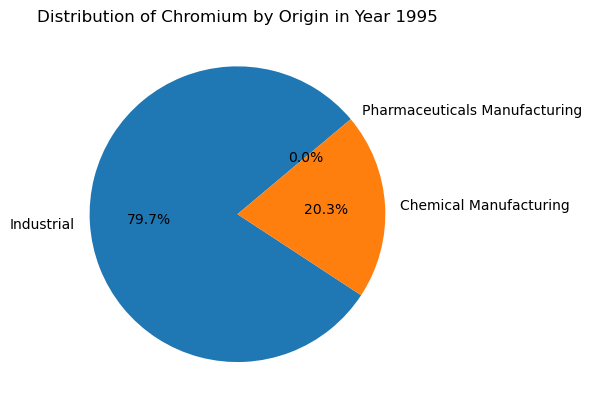

In [115]:
fig, ax = plt.subplots()

ax.pie(water_year_1995.Chromium[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
ax.set_title('Distribution of Chromium by Origin in Year 1995')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

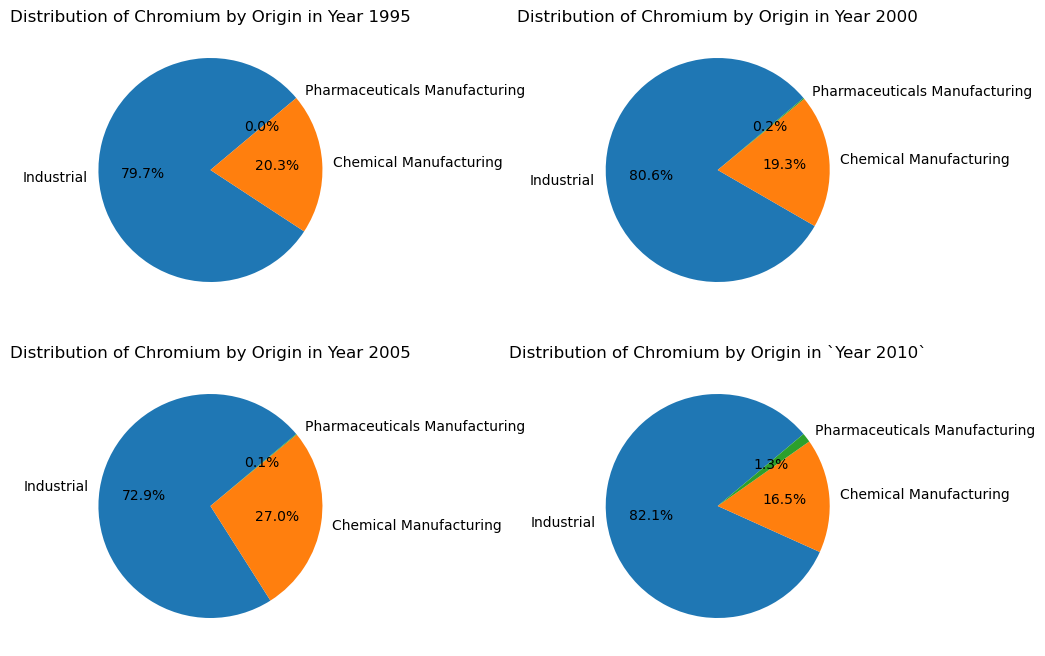

In [116]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_1995.Chromium[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Chromium by Origin in Year 1995')

axes[0,1].pie(water_year_2000.Chromium[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Chromium by Origin in Year 2000')

axes[1,0].pie(water_year_2005.Chromium[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Chromium by Origin in Year 2005')

axes[1,1].pie(water_year_2010.Chromium[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Chromium by Origin in `Year 2010`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

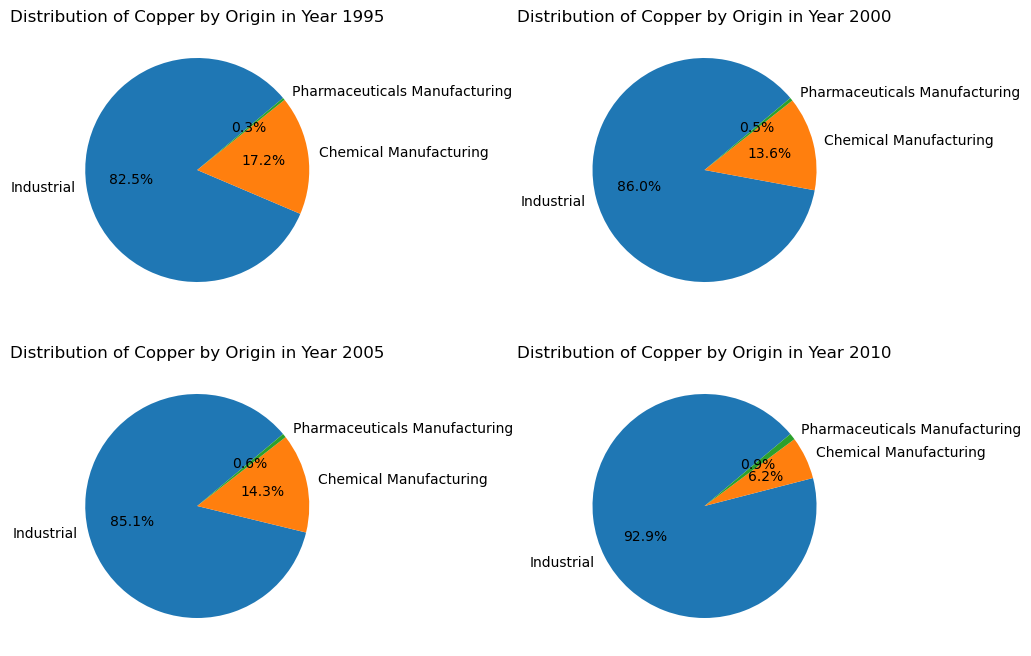

In [118]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_1995.Copper[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Copper by Origin in Year 1995')

axes[0,1].pie(water_year_2000.Copper[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Copper by Origin in Year 2000')

axes[1,0].pie(water_year_2005.Copper[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Copper by Origin in Year 2005')

axes[1,1].pie(water_year_2010.Copper[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Copper by Origin in Year 2010')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

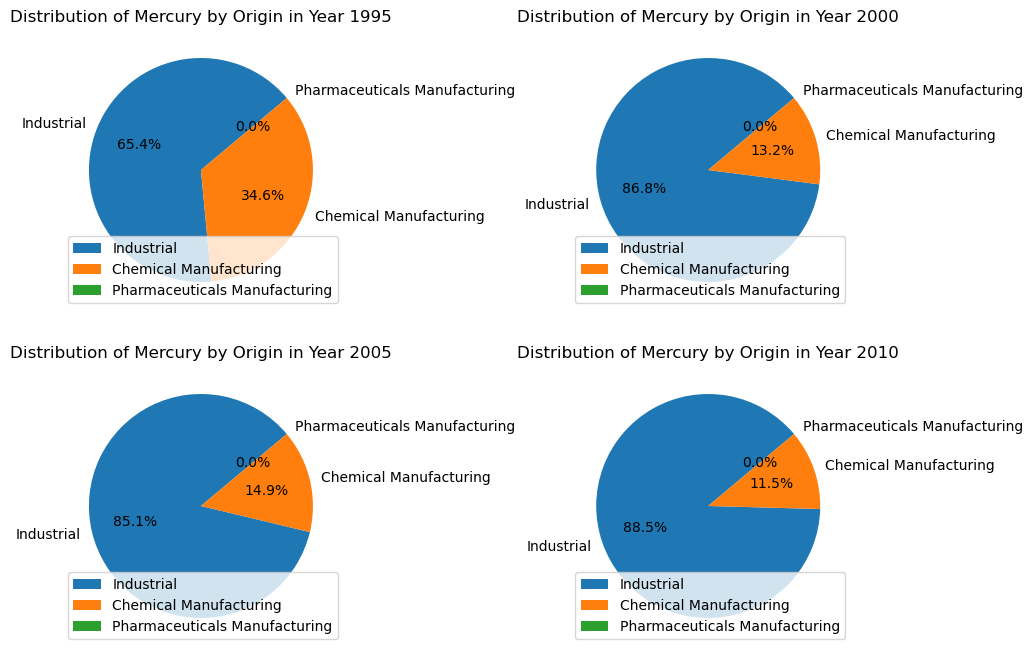

In [126]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_1995.Mercury[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Mercury by Origin in Year 1995')
axes[0,0].legend()

axes[0,1].pie(water_year_2000.Mercury[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Mercury by Origin in Year 2000')
axes[0,1].legend()

axes[1,0].pie(water_year_2005.Mercury[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Mercury by Origin in Year 2005')
axes[1,0].legend()

axes[1,1].pie(water_year_2010.Mercury[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Mercury by Origin in Year 2010')
axes[1,1].legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

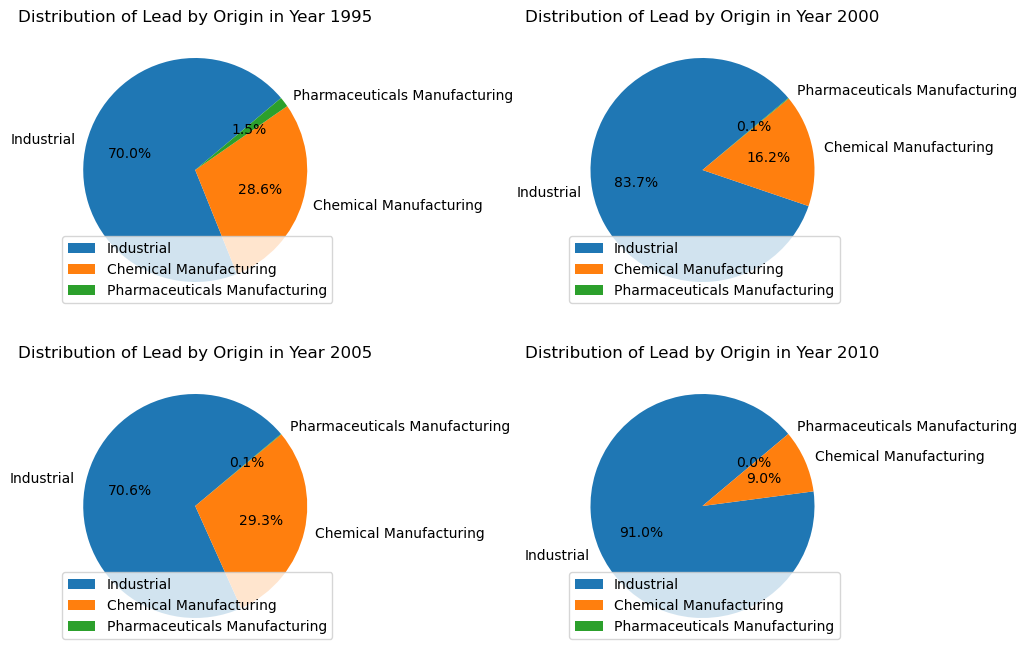

In [121]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_1995.Lead[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Lead by Origin in Year 1995')
axes[0,0].legend()

axes[0,1].pie(water_year_2000.Lead[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Lead by Origin in Year 2000')
axes[0,1].legend()

axes[1,0].pie(water_year_2005.Lead[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Lead by Origin in Year 2005')
axes[1,0].legend()

axes[1,1].pie(water_year_2010.Lead[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Lead by Origin in Year 2010')
axes[1,1].legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

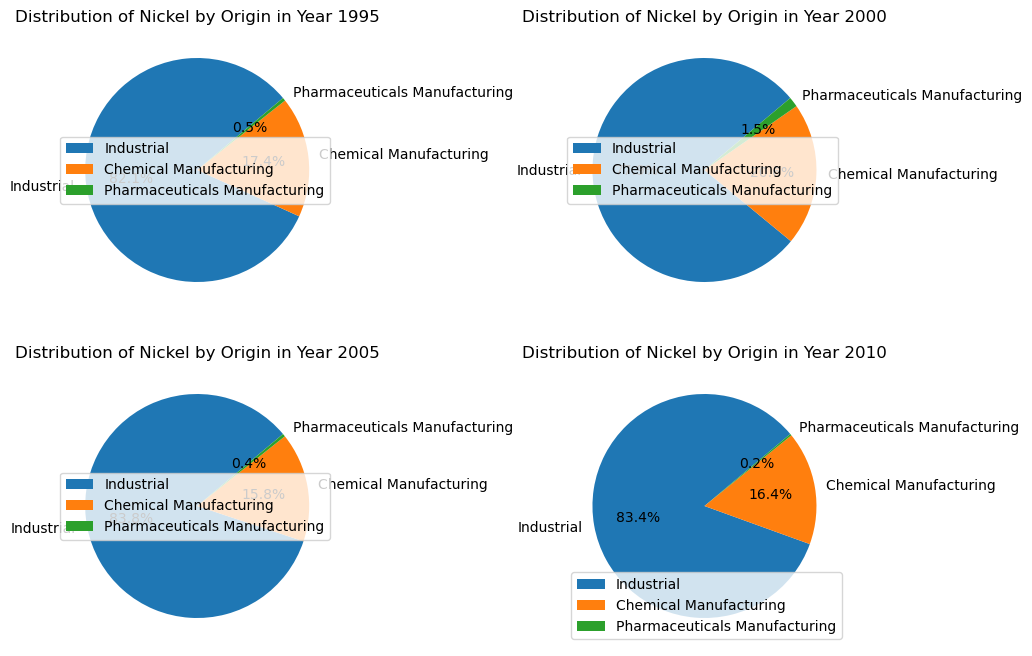

In [122]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_1995.Nickel[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Nickel by Origin in Year 1995')
axes[0,0].legend()

axes[0,1].pie(water_year_2000.Nickel[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Nickel by Origin in Year 2000')
axes[0,1].legend()

axes[1,0].pie(water_year_2005.Nickel[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Nickel by Origin in Year 2005')
axes[1,0].legend()

axes[1,1].pie(water_year_2010.Nickel[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Nickel by Origin in Year 2010')
axes[1,1].legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

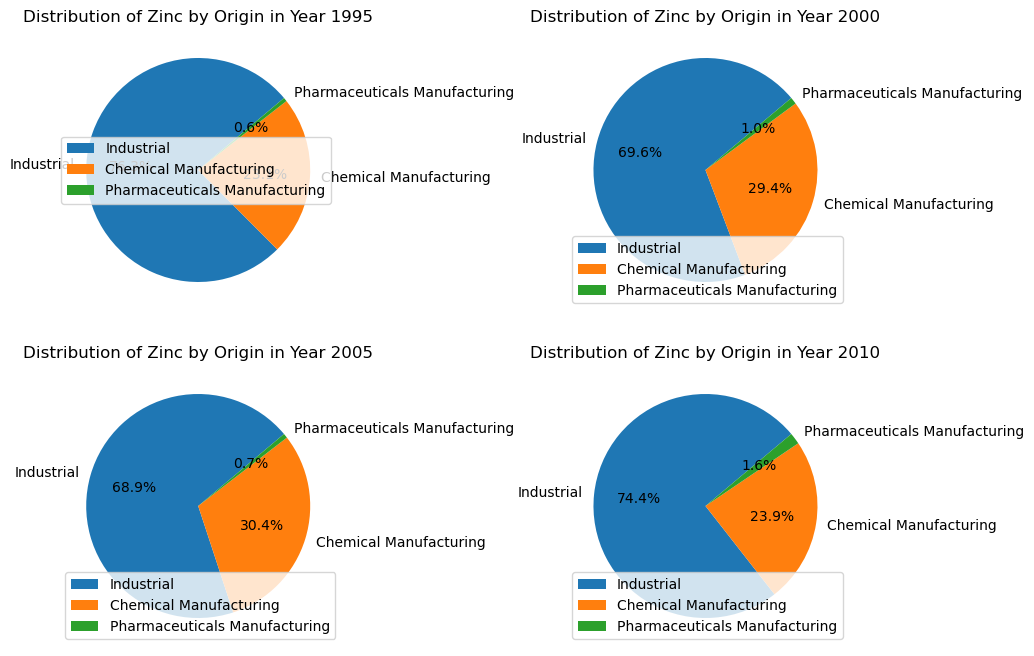

In [123]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_1995.Zinc[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Zinc by Origin in Year 1995')
axes[0,0].legend()

axes[0,1].pie(water_year_2000.Zinc[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Zinc by Origin in Year 2000')
axes[0,1].legend()

axes[1,0].pie(water_year_2005.Zinc[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Zinc by Origin in Year 2005')
axes[1,0].legend()

axes[1,1].pie(water_year_2010.Zinc[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Zinc by Origin in Year 2010')
axes[1,1].legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

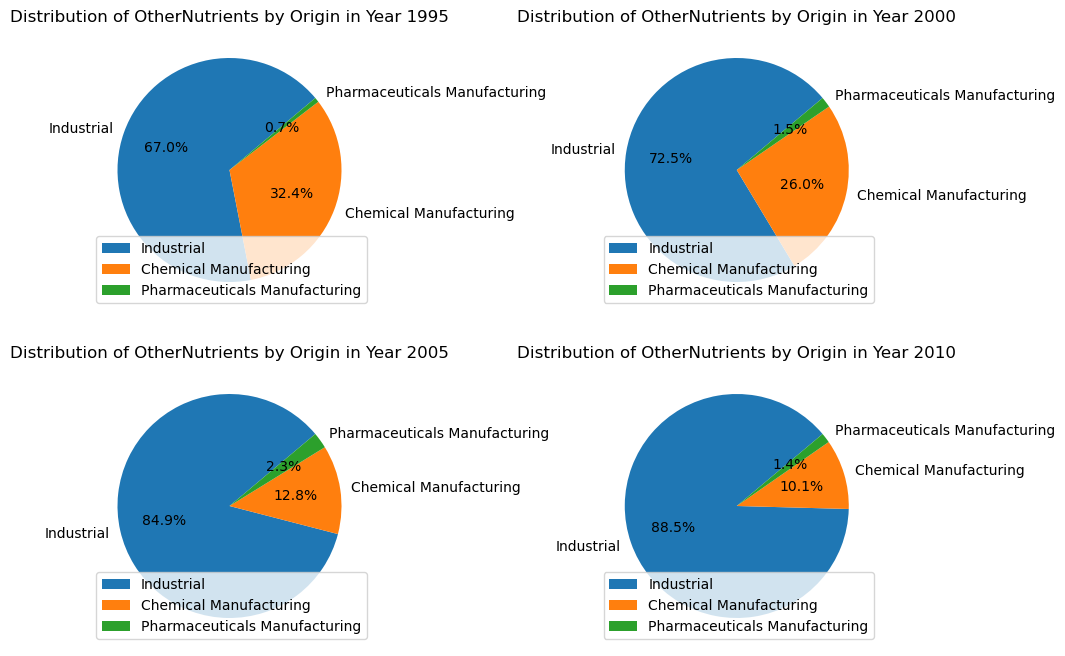

In [124]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_1995.OtherNutrients[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of OtherNutrients by Origin in Year 1995')
axes[0,0].legend()

axes[0,1].pie(water_year_2000.OtherNutrients[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of OtherNutrients by Origin in Year 2000')
axes[0,1].legend()

axes[1,0].pie(water_year_2005.OtherNutrients[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of OtherNutrients by Origin in Year 2005')
axes[1,0].legend()

axes[1,1].pie(water_year_2010.OtherNutrients[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of OtherNutrients by Origin in Year 2010')
axes[1,1].legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

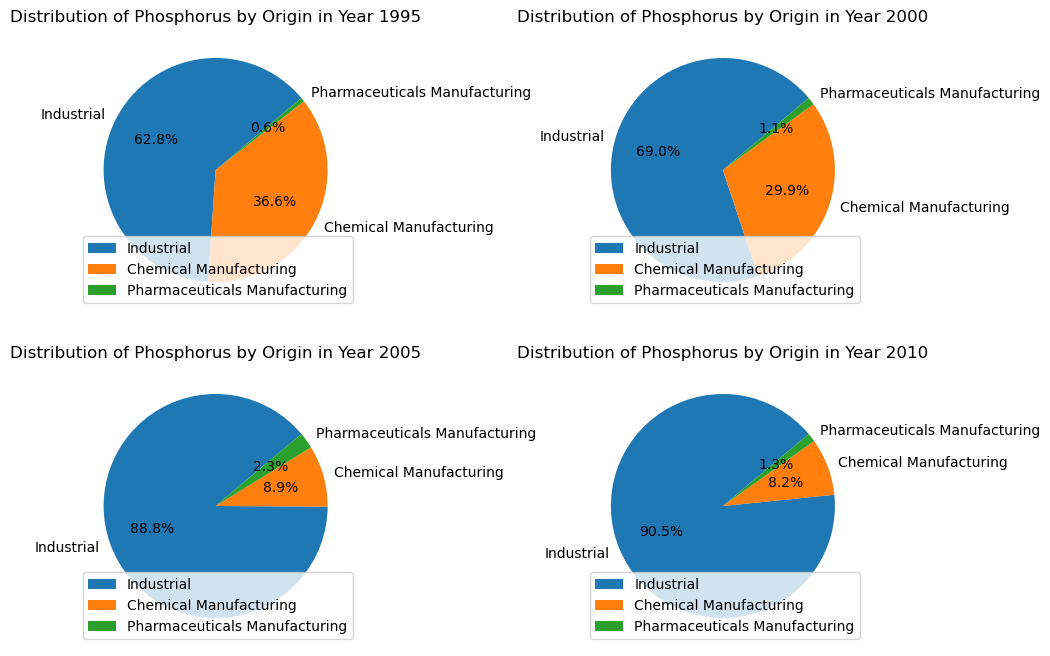

In [125]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_1995.Phosphorus[:], labels=water_year_1995.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Phosphorus by Origin in Year 1995')
axes[0,0].legend()

axes[0,1].pie(water_year_2000.Phosphorus[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Phosphorus by Origin in Year 2000')
axes[0,1].legend()

axes[1,0].pie(water_year_2005.Phosphorus[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Phosphorus by Origin in Year 2005')
axes[1,0].legend()

axes[1,1].pie(water_year_2010.Phosphorus[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Phosphorus by Origin in Year 2010')
axes[1,1].legend()

plt.show

## <span style="color:green"> **2.2.1 - Plot By Column** </span> 

In [106]:
Phosphorus.index 

Index(['Industrial', 'Industrial', 'Industrial', 'Industrial', 'Industrial',
       'Industrial', 'Chemical Manufacturing', 'Chemical Manufacturing',
       'Chemical Manufacturing', 'Chemical Manufacturing',
       'Chemical Manufacturing', 'Chemical Manufacturing',
       'Pharmaceuticals Manufacturing', 'Pharmaceuticals Manufacturing',
       'Pharmaceuticals Manufacturing', 'Pharmaceuticals Manufacturing',
       'Pharmaceuticals Manufacturing', 'Pharmaceuticals Manufacturing'],
      dtype='object', name='Origin')

In [107]:
df_water[['Year']]

,Year
Origin,
Industrial,1995.0
Industrial,2000.0
Industrial,2005.0
Industrial,2010.0
Industrial,2013.0
Industrial,2014.0
Chemical Manufacturing,1995.0
Chemical Manufacturing,2000.0
Chemical Manufacturing,2005.0


In [108]:
Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:]

Origin
Industrial    5391283.0
Industrial    3268213.0
Industrial    1929056.0
Industrial    1740726.0
Industrial    1361662.0
Industrial    1308156.0
Name: Phosphorus, dtype: float64

In [109]:
df_water.Year.unique()[:]

array([1995., 2000., 2005., 2010., 2013., 2014.])

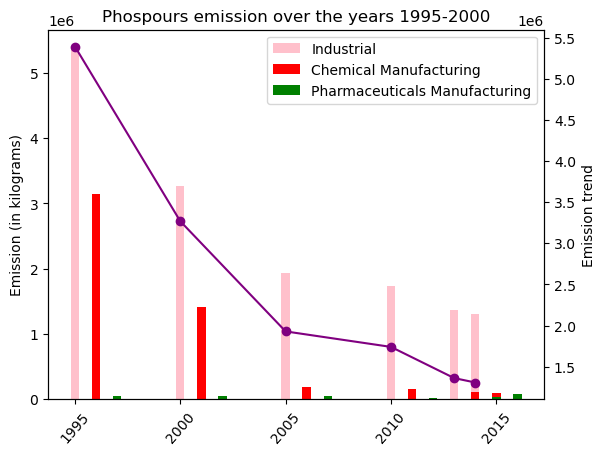

In [110]:
fig, ax1 = plt.subplots()

ax1.bar(df_water.Year.unique()[:], Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:],  0.4, label='Industrial', color='pink')
ax1.bar(df_water.Year.unique()[:]+1, Phosphorus[Phosphorus.index == 'Chemical Manufacturing'].Phosphorus[:],  0.4, label='Chemical Manufacturing', color='red')
ax1.bar(df_water.Year.unique()[:]+2, Phosphorus[Phosphorus.index == 'Pharmaceuticals Manufacturing'].Phosphorus[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
plt.legend()
plt.title('Phospours emission over the years 1995-2000')
plt.ylabel('Emission (in kilograms)')
plt.xticks(rotation=49)

ax2 = ax1.twinx()

ax2.plot(df_water.Year.unique(), Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:], 'o-', color='purple')
# ax2.plot(df_water.Year.unique(), Phosphorus[Phosphorus.index == 'Chemical Manufacturing'].Phosphorus[:], 'o-', color='purple')
# ax2.plot(df_water.Year.unique(), Phosphorus[Phosphorus.index == 'Pharmaceuticals Manufacturing'].Phosphorus[:], 'o-', color='purple')
ax2.set_ylabel('Emission trend')

# fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

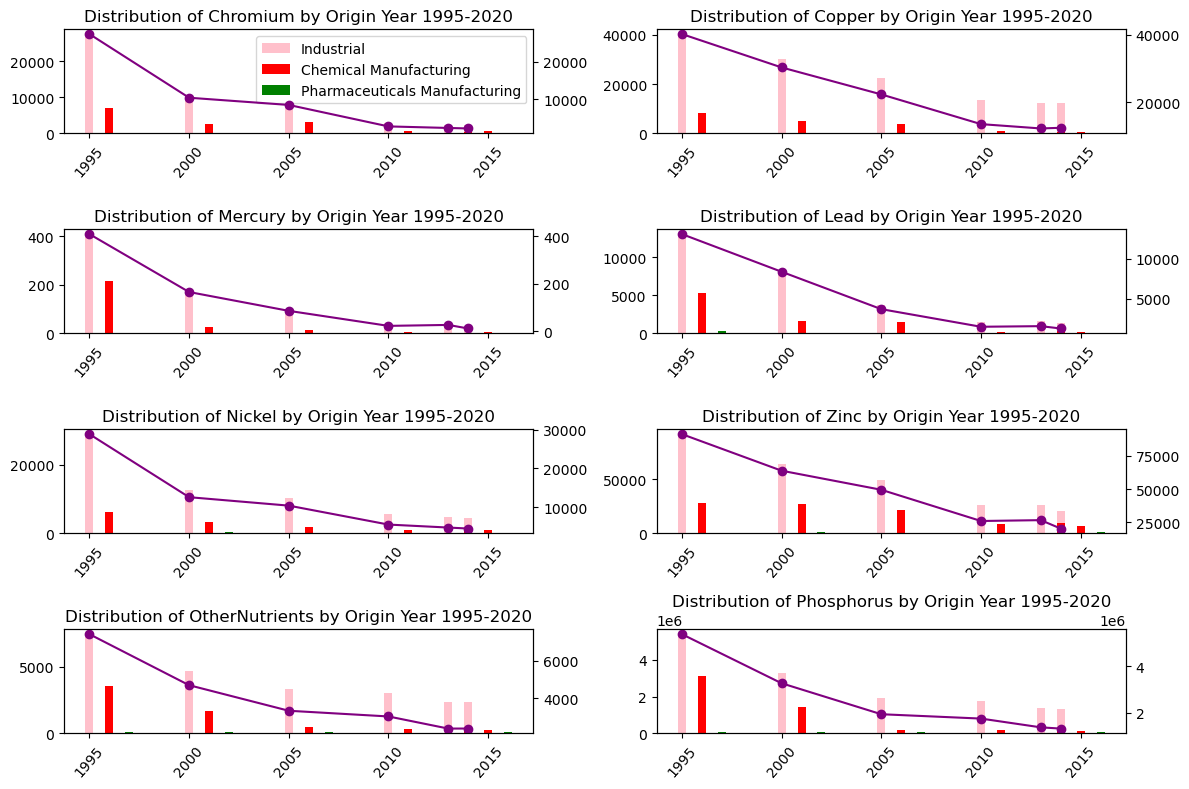

In [188]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

# Chromium	Copper	Mercury	Lead	Nickel	Zinc	OtherNutrients	Phosphorus

# Chromium
axes[0,0].bar(df_water.Year.unique()[:], Chromium[Chromium.index == 'Industrial'].Chromium[:],  0.4, label='Industrial', color='pink')
axes[0,0].bar(df_water.Year.unique()[:]+1, Chromium[Chromium.index == 'Chemical Manufacturing'].Chromium[:],  0.4, label='Chemical Manufacturing', color='red')
axes[0,0].bar(df_water.Year.unique()[:]+2, Chromium[Chromium.index == 'Pharmaceuticals Manufacturing'].Chromium[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)
axes[0,0].set_title('Distribution of Chromium by Origin Year 1995-2020')

ax2 = axes[0,0].twinx()
ax2.plot(df_water.Year.unique(), Chromium[Chromium.index == 'Industrial'].Chromium[:], 'o-', color='purple')


# Copper
axes[0,1].bar(df_water.Year.unique()[:], Copper[Copper.index == 'Industrial'].Copper[:],  0.4, label='Industrial', color='pink')
axes[0,1].bar(df_water.Year.unique()[:]+1, Copper[Copper.index == 'Chemical Manufacturing'].Copper[:],  0.4, label='Chemical Manufacturing', color='red')
axes[0,1].bar(df_water.Year.unique()[:]+2, Copper[Copper.index == 'Pharmaceuticals Manufacturing'].Copper[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[0,1].tick_params(axis='x', rotation=49)
axes[0,1].set_title('Distribution of Copper by Origin Year 1995-2020')

ax2 = axes[0,1].twinx()
ax2.plot(df_water.Year.unique(), Copper[Copper.index == 'Industrial'].Copper[:], 'o-', color='purple')


# Mercury 
axes[1,0].bar(df_water.Year.unique()[:], Mercury[Mercury.index == 'Industrial'].Mercury[:],  0.4, label='Industrial', color='pink')
axes[1,0].bar(df_water.Year.unique()[:]+1, Mercury[Mercury.index == 'Chemical Manufacturing'].Mercury[:],  0.4, label='Chemical Manufacturing', color='red')
axes[1,0].bar(df_water.Year.unique()[:]+2, Mercury[Copper.index == 'Pharmaceuticals Manufacturing'].Mercury[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[1,0].tick_params(axis='x', rotation=49)
axes[1,0].set_title('Distribution of Mercury by Origin Year 1995-2020')

ax2 = axes[1,0].twinx()
ax2.plot(df_water.Year.unique(), Mercury[Mercury.index == 'Industrial'].Mercury[:], 'o-', color='purple')


# Lead
axes[1,1].bar(df_water.Year.unique()[:], Lead[Lead.index == 'Industrial'].Lead[:],  0.4, label='Industrial', color='pink')
axes[1,1].bar(df_water.Year.unique()[:]+1, Lead[Lead.index == 'Chemical Manufacturing'].Lead[:],  0.4, label='Chemical Manufacturing', color='red')
axes[1,1].bar(df_water.Year.unique()[:]+2, Lead[Lead.index == 'Pharmaceuticals Manufacturing'].Lead[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[1,1].tick_params(axis='x', rotation=49)
axes[1,1].set_title('Distribution of Lead by Origin Year 1995-2020')

ax2 = axes[1,1].twinx()
ax2.plot(df_water.Year.unique(), Lead[Lead.index == 'Industrial'].Lead[:], 'o-', color='purple')

# Nickel
axes[2,0].bar(df_water.Year.unique()[:], Nickel[Nickel.index == 'Industrial'].Nickel[:],  0.4, label='Industrial', color='pink')
axes[2,0].bar(df_water.Year.unique()[:]+1, Nickel[Nickel.index == 'Chemical Manufacturing'].Nickel[:],  0.4, label='Chemical Manufacturing', color='red')
axes[2,0].bar(df_water.Year.unique()[:]+2, Nickel[Nickel.index == 'Pharmaceuticals Manufacturing'].Nickel[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[2,0].tick_params(axis='x', rotation=49)
axes[2,0].set_title('Distribution of Nickel by Origin Year 1995-2020')

ax2 = axes[2,0].twinx()
ax2.plot(df_water.Year.unique(), Nickel[Nickel.index == 'Industrial'].Nickel[:], 'o-', color='purple')


# Zinc
axes[2,1].bar(df_water.Year.unique()[:], Zinc[Zinc.index == 'Industrial'].Zinc[:],  0.4, label='Industrial', color='pink')
axes[2,1].bar(df_water.Year.unique()[:]+1, Zinc[Zinc.index == 'Chemical Manufacturing'].Zinc[:],  0.4, label='Chemical Manufacturing', color='red')
axes[2,1].bar(df_water.Year.unique()[:]+2, Zinc[Zinc.index == 'Pharmaceuticals Manufacturing'].Zinc[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[2,1].tick_params(axis='x', rotation=49)
axes[2,1].set_title('Distribution of Zinc by Origin Year 1995-2020')

ax2 = axes[2,1].twinx()
ax2.plot(df_water.Year.unique(), Zinc[Zinc.index == 'Industrial'].Zinc[:], 'o-', color='purple')


# OtherNutrients
axes[3,0].bar(df_water.Year.unique()[:], OtherNutrients[OtherNutrients.index == 'Industrial'].OtherNutrients[:],  0.4, label='Industrial', color='pink')
axes[3,0].bar(df_water.Year.unique()[:]+1, OtherNutrients[OtherNutrients.index == 'Chemical Manufacturing'].OtherNutrients[:],  0.4, label='Chemical Manufacturing', color='red')
axes[3,0].bar(df_water.Year.unique()[:]+2, OtherNutrients[OtherNutrients.index == 'Pharmaceuticals Manufacturing'].OtherNutrients[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[3,0].tick_params(axis='x', rotation=49)
axes[3,0].set_title('Distribution of OtherNutrients by Origin Year 1995-2020')

ax2 = axes[3,0].twinx()
ax2.plot(df_water.Year.unique(), OtherNutrients[OtherNutrients.index == 'Industrial'].OtherNutrients[:], 'o-', color='purple')


# Phosphorus
axes[3,1].bar(df_water.Year.unique()[:], Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:],  0.4, label='Industrial', color='pink')
axes[3,1].bar(df_water.Year.unique()[:]+1, Phosphorus[Phosphorus.index == 'Chemical Manufacturing'].Phosphorus[:],  0.4, label='Chemical Manufacturing', color='red')
axes[3,1].bar(df_water.Year.unique()[:]+2, Phosphorus[Phosphorus.index == 'Pharmaceuticals Manufacturing'].Phosphorus[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[3,1].tick_params(axis='x', rotation=49)
axes[3,1].set_title('Distribution of Phosphorus by Origin Year 1995-2020')

ax2 = axes[3,1].twinx()
ax2.plot(df_water.Year.unique(), Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:], 'o-', color='purple')

fig.tight_layout()
plt.show

## <span style="color:green"> **2.2.3 - Plot By Index** </span> 

In [136]:
Chemical_Manufacturing

,Year,Chromium,Copper,Mercury,Lead,Nickel,Zinc,OtherNutrients,Phosphorus
Origin,,,,,,,,,
Chemical Manufacturing,1995.0,7001.0,8386.0,216.0,5331.0,6131.0,27685.0,3592.0,3140946.0
Chemical Manufacturing,2000.0,2495.0,4780.0,25.0,1622.0,3328.0,26936.0,1684.0,1416894.0
Chemical Manufacturing,2005.0,3147.0,3761.0,15.0,1538.0,1959.0,21810.0,504.0,192690.0
Chemical Manufacturing,2010.0,555.0,891.0,3.0,150.0,1080.0,8305.0,346.0,158679.0
Chemical Manufacturing,2013.0,396.0,585.0,2.0,292.0,1052.0,9371.0,320.0,109549.0
Chemical Manufacturing,2014.0,543.0,564.0,3.0,118.0,807.0,6330.0,284.0,102991.0


In [140]:
# Get 1st row
Chemical_Manufacturing.iloc[1]

Year                 1995.0
Chromium             7001.0
Copper               8386.0
Mercury               216.0
Lead                 5331.0
Nickel               6131.0
Zinc                27685.0
OtherNutrients       3592.0
Phosphorus        3140946.0
Name: Chemical Manufacturing, dtype: float64

In [170]:
# Get 1st row and skip 1st element (eg. year)
Chemical_Manufacturing.iloc[1][1:]

Chromium             2495.0
Copper               4780.0
Mercury                25.0
Lead                 1622.0
Nickel               3328.0
Zinc                26936.0
OtherNutrients       1684.0
Phosphorus        1416894.0
Name: Chemical Manufacturing, dtype: float64

In [155]:
# Get 1st row and skip 1st element (eg. year)
Chemical_Manufacturing.iloc[0][1:].values

array([7.001000e+03, 8.386000e+03, 2.160000e+02, 5.331000e+03,
       6.131000e+03, 2.768500e+04, 3.592000e+03, 3.140946e+06])

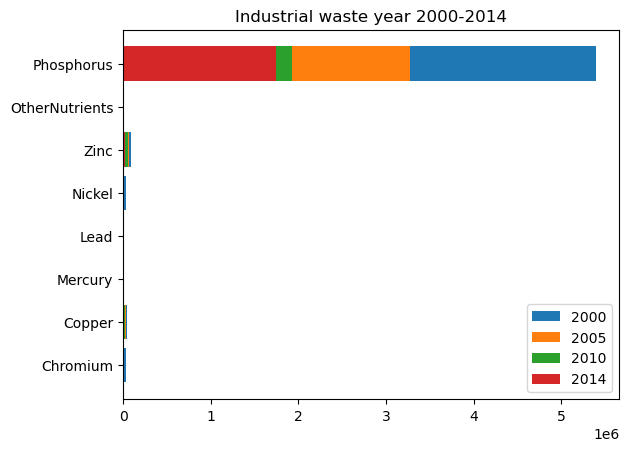

In [185]:
# Perfect
plt.barh(Industrial.iloc[0][1:].index, Industrial.iloc[0][1:], label='2000')
plt.barh(Industrial.iloc[0][1:].index, Industrial.iloc[1][1:], label='2005')
plt.barh(Industrial.iloc[0][1:].index, Industrial.iloc[2][1:], label='2010')
plt.barh(Industrial.iloc[0][1:].index, Industrial.iloc[3][1:], label='2014')

plt.title('Industrial waste year 2000-2014')
plt.legend(loc = 'lower right')

plt.show()

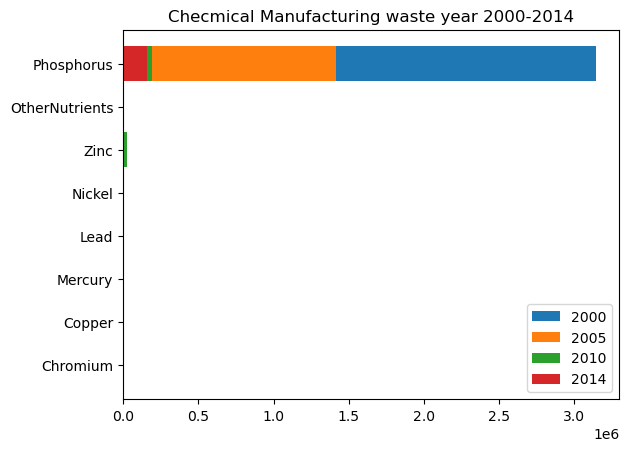

In [186]:
# Perfect
plt.barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[0][1:], label='2000')
plt.barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[1][1:], label='2005')
plt.barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[2][1:], label='2010')
plt.barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[3][1:], label='2014')

plt.title('Checmical Manufacturing waste year 2000-2014')
plt.legend(loc = 'lower right')

plt.show()

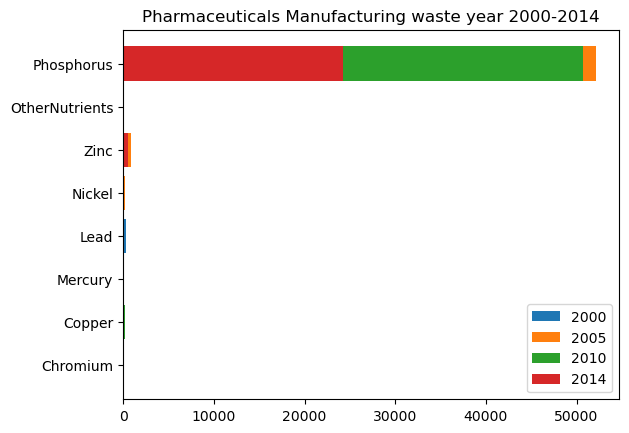

In [187]:
# Perfect
plt.barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[0][1:], label='2000')
plt.barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[1][1:], label='2005')
plt.barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[2][1:], label='2010')
plt.barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[3][1:], label='2014')

plt.title('Pharmaceuticals Manufacturing waste year 2000-2014')
plt.legend(loc = 'lower right')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

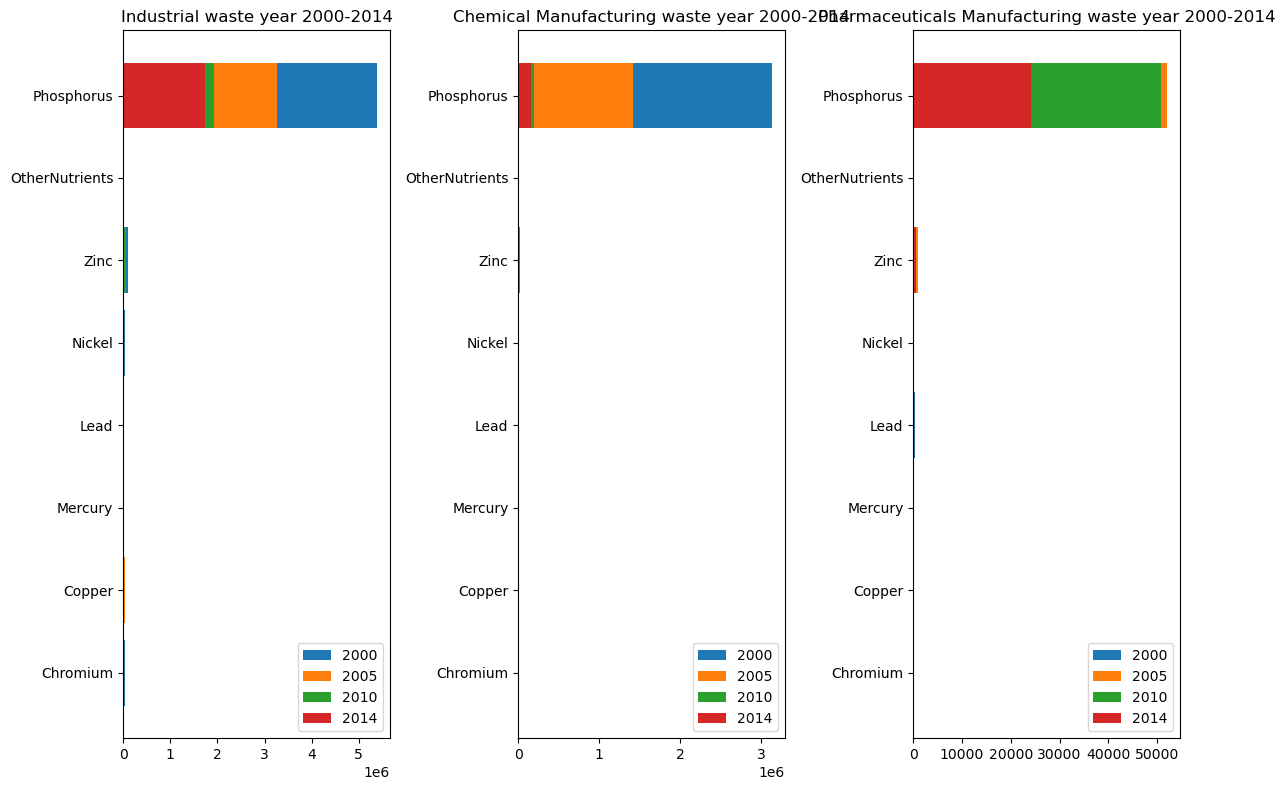

In [193]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# Industrial
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[0][1:], label='2000')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[1][1:], label='2005')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[2][1:], label='2010')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[3][1:], label='2014')

axes[0].legend(loc = 'lower right')
axes[0].set_title('Industrial waste year 2000-2014')


axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[0][1:], label='2000')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[1][1:], label='2005')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[2][1:], label='2010')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[3][1:], label='2014')

axes[1].legend(loc = 'lower right')
axes[1].set_title('Chemical Manufacturing waste year 2000-2014')


axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[0][1:], label='2000')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[1][1:], label='2005')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[2][1:], label='2010')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[3][1:], label='2014')

axes[2].legend(loc = 'lower right')
axes[2].set_title('Pharmaceuticals Manufacturing waste year 2000-2014')

fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

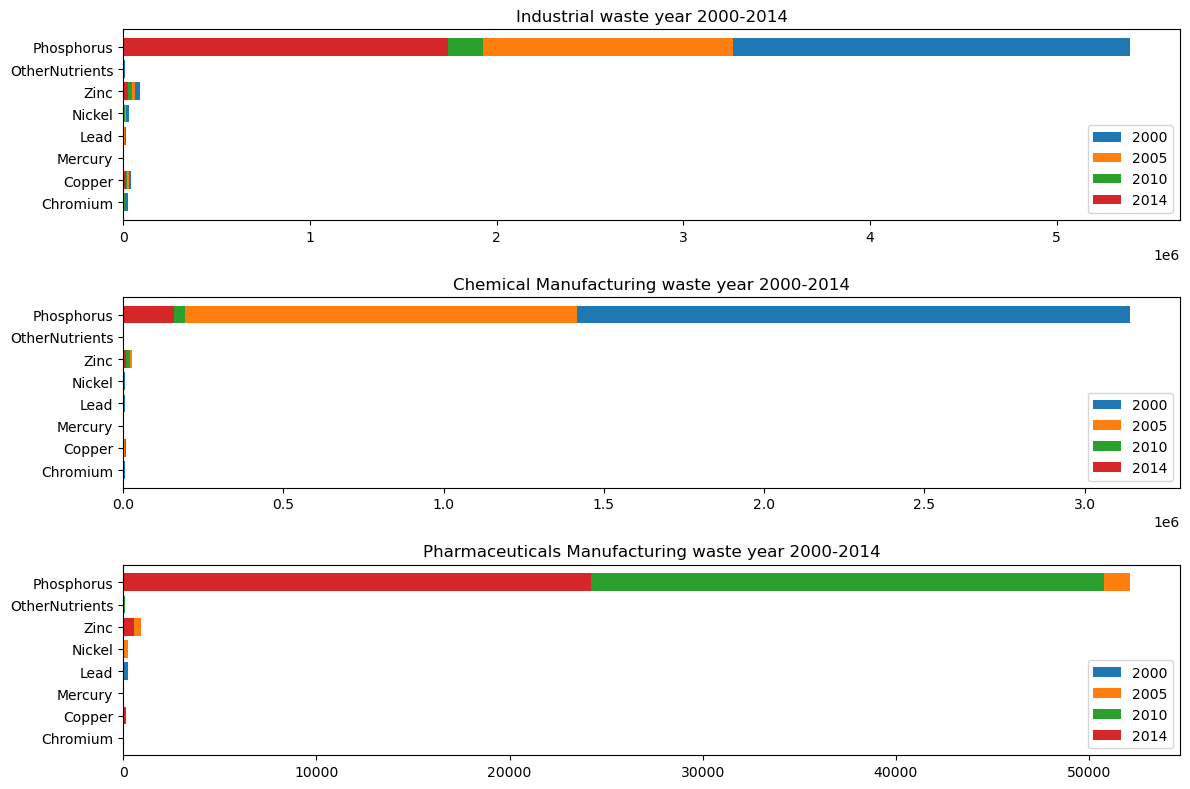

In [194]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

# Industrial
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[0][1:], label='2000')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[1][1:], label='2005')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[2][1:], label='2010')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[3][1:], label='2014')

axes[0].legend(loc = 'lower right')
axes[0].set_title('Industrial waste year 2000-2014')


axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[0][1:], label='2000')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[1][1:], label='2005')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[2][1:], label='2010')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[3][1:], label='2014')

axes[1].legend(loc = 'lower right')
axes[1].set_title('Chemical Manufacturing waste year 2000-2014')


axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[0][1:], label='2000')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[1][1:], label='2005')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[2][1:], label='2010')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[3][1:], label='2014')

axes[2].legend(loc = 'lower right')
axes[2].set_title('Pharmaceuticals Manufacturing waste year 2000-2014')

fig.tight_layout()
plt.show

# Learning 

## Stair plot 

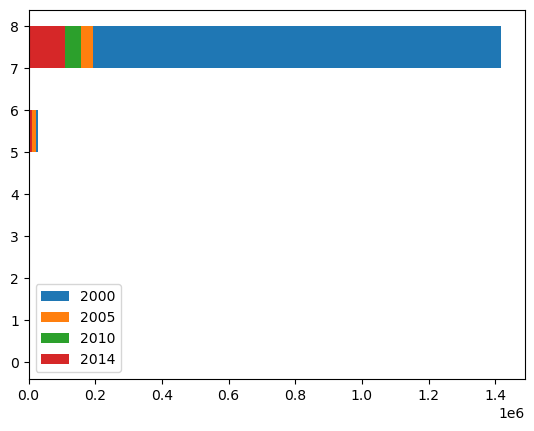

In [175]:
# Khas nahi hai
plt.stairs(Chemical_Manufacturing.iloc[1][1:].values, fill=True, orientation ='horizontal', label='2000')
plt.stairs(Chemical_Manufacturing.iloc[2][1:].values, fill=True, orientation ='horizontal', label='2005')
plt.stairs(Chemical_Manufacturing.iloc[3][1:].values, fill=True, orientation ='horizontal', label='2010')
plt.stairs(Chemical_Manufacturing.iloc[4][1:].values, fill=True, orientation ='horizontal', label='2014')
plt.legend()
plt.show()

In [150]:
# # fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# axes[0,0].pie(Chemical_Manufacturing.iloc[0][1:], labels=Chemical_Manufacturing.iloc[0][1:].index, autopct='%1.1f%%', startangle=40)
# axes[0,0].set_title('Distribution of Phosphorus by Origin in Year 2000')
# axes[0,0].legend()

# axes[0,1].pie(Chemical_Manufacturing.iloc[1][1:], labels=Chemical_Manufacturing.iloc[0][1:].index, autopct='%1.1f%%', startangle=40)
# axes[0,1].set_title('Distribution of Phosphorus by Origin in Year 2005')
# axes[0,1].legend()

# axes[1,0].pie(Chemical_Manufacturing.iloc[2][1:], labels=Chemical_Manufacturing.iloc[0][1:].index, autopct='%1.1f%%', startangle=40)
# axes[1,0].set_title('Distribution of Phosphorus by Origin in Year 2010')
# axes[1,0].legend()

# axes[1,1].pie(Chemical_Manufacturing.iloc[3][1:], labels=Chemical_Manufacturing.iloc[0][1:].index, autopct='%1.1f%%', startangle=40)
# axes[1,1].set_title('Distribution of Phosphorus by Origin in Year 2014')
# axes[1,1].legend()

# plt.show

### Selecting the product of Electronic Type 

Syntax 1:

In case of string:

df.loc[df[‘column_name’] <operator> operand]


In case of integer/float: (no quotes)


df.loc[df[‘column_name’] <operator> operand]


Parameters:

df: represents data frame

cname: represents column name

condition: represents condition on which rows has to be selected

Example:

select_prod = df.loc[df['Type'] == 'Electronic'] 

df.loc[df['Price'] >= 25000] 


Syntax 2: 

data_fram[data_fram [ "year" ] == 2010]

In [ ]:
# df_water[df_water['Chromium'].isnull()]

In [ ]:
 # df_water.Year.unique()

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.subplot(1, 1, 1)

# plt.bar(X_axis-0.10, df_water.Chromium, 0.4, label='Chromium')
# plt.bar(X_axis-0.6, df_water.Copper, 0.4, label='Copper')
# # plt.bar(X_axis-0.3, df_water.Mercury, 0.4, label='Mercury')
# # plt.bar(X_axis-0.0, df_water.Lead, 0.4, label='Lead')
# # plt.bar(X_axis-0.5, df_water.Nickel, 0.4, label='Nickel')
# # plt.bar(X_axis+0.8, df_water.Zinc, 0.4, label='Zinc')
# # plt.bar(X_axis+0.12, df_water.Zinc, 0.4, label='OtherNutrients')
# # plt.bar(X_axis+0.14, df_water.Zinc, 0.4, label='Phosphorus')

# plt.legend()
# plt.title('ELements emission')
# plt.ylabel('Share')
# plt.xticks(X_axis)
# # plt.xticks(df_water.Year.unique())
